# SDG Goal1 Analysis

## Goal 1: End poverty in all its forms everywhere

Eradicating extreme poverty for all people everywhere by 2030 is a pivotal goal of the 2030 Agenda for Sustainable Development. Extreme poverty, defined as surviving on less than $2.15 per person per day at 2017 purchasing power parity, has witnessed remarkable declines over recent decades.

However, the emergence of COVID-19 marked a turning point, reversing these gains as the number of individuals living in extreme poverty increased for the first time in a generation by almost 90 million over previous predictions.

Even prior to the pandemic, the momentum of poverty reduction was slowing down. By the end of 2022, nowcasting suggested that 8.4 per cent of the world’s population, or as many as 670 million people, could still be living in extreme poverty. This setback effectively erased approximately three years of progress in poverty alleviation.

If current patterns persist, an estimated 7% of the global population – around 575 million people – could still find themselves trapped in extreme poverty by 2030, with a significant concentration in sub-Saharan Africa.

A shocking revelation is the resurgence of hunger levels to those last observed in 2005. Equally concerning is the persistent increase in food prices across a larger number of countries compared to the period from 2015 to 2019. This dual challenge of poverty and food security poses a critical global concern.

#### 1.3: Implement nationally appropriate social protection systems and measures for all, including floors, and by 2030 achieve substantial coverage of the poor and the vulnerable

#### 1.4: By 2030, ensure that all men and women, in particular the poor and the vulnerable, have equal rights to economic resources, as well as access to basic services, ownership and control over land and other forms of property, inheritance, natural resources, appropriate new technology and financial services, including microfinance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('Goal1.xlsx')

In [3]:
data.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,Reporting Type,Observation Status,Units,Nature,Quantile,IHR Capacity,Hazard type,Migratory status,Population Group,Name of international institution
0,1,1.3,1.3.1,SI_COV_BENFTS,[ILO] Proportion of population covered by at l...,4,Afghanistan,2020,7.5,2020,...,G,A,PERCENT,E,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.3,1.3.1,SI_COV_BENFTS,[ILO] Proportion of population covered by at l...,24,Angola,2017,9.9,2017,...,G,A,PERCENT,E,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1.3,1.3.1,SI_COV_BENFTS,[ILO] Proportion of population covered by at l...,24,Angola,2020,10.5,2020,...,G,A,PERCENT,E,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.3,1.3.1,SI_COV_BENFTS,[ILO] Proportion of population covered by at l...,31,Azerbaijan,2016,40.3,2016,...,G,A,PERCENT,E,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1.3,1.3.1,SI_COV_BENFTS,[ILO] Proportion of population covered by at l...,31,Azerbaijan,2020,39.0,2020,...,G,A,PERCENT,E,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29968 entries, 0 to 29967
Data columns (total 24 columns):
Goal                                 29968 non-null int64
Target                               29968 non-null float64
Indicator                            29968 non-null object
SeriesCode                           29968 non-null object
SeriesDescription                    29968 non-null object
GeoAreaCode                          29968 non-null int64
GeoAreaName                          29968 non-null object
TimePeriod                           29968 non-null int64
Value                                29968 non-null float64
Time_Detail                          29968 non-null int64
Source                               29968 non-null object
FootNote                             436 non-null object
Sex                                  4251 non-null object
Location                             23553 non-null object
Reporting Type                       29968 non-null object
Observation

#### data cleaning process

In [7]:
#dropping columns which have null values only
data=data.drop(columns=['IHR Capacity','Hazard type','Migratory status','Population Group','Name of international institution'])

In [8]:
data.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Sex,Location,Reporting Type,Observation Status,Units,Nature,Quantile
0,1,1.3,1.3.1,SI_COV_BENFTS,[ILO] Proportion of population covered by at l...,4,Afghanistan,2020,7.5,2020,Source: ILO estimates based on country data co...,NaN,BOTHSEX,NaN,G,A,PERCENT,E,NaN
1,1,1.3,1.3.1,SI_COV_BENFTS,[ILO] Proportion of population covered by at l...,24,Angola,2017,9.9,2017,Source: ILO estimates based on country data co...,NaN,BOTHSEX,NaN,G,A,PERCENT,E,NaN
2,1,1.3,1.3.1,SI_COV_BENFTS,[ILO] Proportion of population covered by at l...,24,Angola,2020,10.5,2020,Source: ILO estimates based on country data co...,NaN,BOTHSEX,NaN,G,A,PERCENT,E,NaN
3,1,1.3,1.3.1,SI_COV_BENFTS,[ILO] Proportion of population covered by at l...,31,Azerbaijan,2016,40.3,2016,Source: ILO estimates based on country data co...,NaN,BOTHSEX,NaN,G,A,PERCENT,E,NaN
4,1,1.3,1.3.1,SI_COV_BENFTS,[ILO] Proportion of population covered by at l...,31,Azerbaijan,2020,39.0,2020,Source: ILO estimates based on country data co...,NaN,BOTHSEX,NaN,G,A,PERCENT,E,NaN


In [9]:
#Handling missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29968 entries, 0 to 29967
Data columns (total 19 columns):
Goal                  29968 non-null int64
Target                29968 non-null float64
Indicator             29968 non-null object
SeriesCode            29968 non-null object
SeriesDescription     29968 non-null object
GeoAreaCode           29968 non-null int64
GeoAreaName           29968 non-null object
TimePeriod            29968 non-null int64
Value                 29968 non-null float64
Time_Detail           29968 non-null int64
Source                29968 non-null object
FootNote              436 non-null object
Sex                   4251 non-null object
Location              23553 non-null object
Reporting Type        29968 non-null object
Observation Status    4121 non-null object
Units                 29968 non-null object
Nature                29968 non-null object
Quantile              2164 non-null object
dtypes: float64(2), int64(4), object(13)
memory usage: 4.3+ MB

In [10]:
#checking null values
data.isnull().sum()

Goal                      0
Target                    0
Indicator                 0
SeriesCode                0
SeriesDescription         0
GeoAreaCode               0
GeoAreaName               0
TimePeriod                0
Value                     0
Time_Detail               0
Source                    0
FootNote              29532
Sex                   25717
Location               6415
Reporting Type            0
Observation Status    25847
Units                     0
Nature                    0
Quantile              27804
dtype: int64

In [11]:
#replacing nulls values with #NA
data=data.replace(np.nan,'#NA')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29968 entries, 0 to 29967
Data columns (total 19 columns):
Goal                  29968 non-null int64
Target                29968 non-null float64
Indicator             29968 non-null object
SeriesCode            29968 non-null object
SeriesDescription     29968 non-null object
GeoAreaCode           29968 non-null int64
GeoAreaName           29968 non-null object
TimePeriod            29968 non-null int64
Value                 29968 non-null float64
Time_Detail           29968 non-null int64
Source                29968 non-null object
FootNote              29968 non-null object
Sex                   29968 non-null object
Location              29968 non-null object
Reporting Type        29968 non-null object
Observation Status    29968 non-null object
Units                 29968 non-null object
Nature                29968 non-null object
Quantile              29968 non-null object
dtypes: float64(2), int64(4), object(13)
memory usage: 4.

In [13]:
print("Targets: ",data.Target.unique())
print("Indicators: ",data.Indicator.unique())

Targets:  [1.3 1.4]
Indicators:  ['1.3.1' '1.4.1' '1.4.2']


In [14]:
#Column Names
data.columns

Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail',
       'Source', 'FootNote', 'Sex', 'Location', 'Reporting Type',
       'Observation Status', 'Units', 'Nature', 'Quantile'],
      dtype='object')

In [15]:
data.describe()

,Goal,Target,GeoAreaCode,TimePeriod,Value,Time_Detail
count,29968.0,29968.000000,29968.000000,29968.000000,29968.000000,29968.000000
mean,1.0,1.379028,429.563534,2010.988955,71.061616,2010.988955
std,0.0,0.040712,252.711226,6.124762,32.332111,6.124762
min,1.0,1.300000,4.000000,2000.000000,0.000000,2000.000000
25%,1.0,1.400000,212.000000,2006.000000,47.000000,2006.000000
50%,1.0,1.400000,428.000000,2011.000000,86.000000,2011.000000
75%,1.0,1.400000,643.000000,2016.000000,98.000000,2016.000000
max,1.0,1.400000,894.000000,2020.000000,100.000000,2020.000000


In [16]:
print("\nParameters Under Indicator 1.3.1\n")
print(data[(data.Indicator=='1.3.1')].SeriesDescription.unique(),"\n")
print("\nParameters Under Indicator 1.4.1\n")
print(data[(data.Indicator=='1.4.1')].SeriesDescription.unique(),"\n")
print("\nParameters Under Indicator 1.4.2\n")
print(data[(data.Indicator=='1.4.2')].SeriesDescription.unique(),"\n")


Parameters Under Indicator 1.3.1

['[ILO] Proportion of population covered by at least one social protection benefit, by sex (%)'
 '[ILO] Proportion of children/households receiving child/family cash benefit, by sex (%)'
 '[ILO] Proportion of population with severe disabilities receiving disability cash benefit, by sex (%)'
 '[World Bank] Proportion of population covered by labour market programs (%)'
 '[ILO] Proportion of mothers with newborns receiving maternity cash benefit (%)'
 '[ILO] Proportion of population above statutory pensionable age receiving a pension, by sex (%)'
 '[ILO] Proportion of poor population receiving social assistance cash benefit, by sex (%)'
 '[World Bank] Proportion of population covered by social assistance programs (%)'
 '[World Bank] Proportion of population covered by social insurance programs (%)'
 '[ILO] Proportion of unemployed persons receiving unemployment cash benefit, by sex (%)'
 '[ILO] Proportion of vulnerable population receiving social assist

#### The data is cleaned and exploratory analysis is done so as to know more about the data and also the data is now ready to be analysed.

## Indicator Analysis

We have selected 3 indicators 1.3.1, 1.4.1 and 1.4.2. Under these indicators we have different criterias. We will now analyse the values with respect to India, world, continent wise,india vs world, top 10 countries and bottom 10 countries.

### Target Indicatior : 1.3.1 Proportion of unemployed persons receiving unemployment cash benefit, by sex (%)

In [17]:
target1_3=data[data.Indicator=='1.3.1']
target1_3.shape

A1=target1_3[(target1_3.SeriesDescription=='[ILO] Proportion of unemployed persons receiving unemployment cash benefit, by sex (%)')]

#### Objective:  Proportion of unemployed persons receiving unemployment cash benefit, by sex (%) in world

In [18]:
world_A1=A1.pivot_table(index='TimePeriod',values='Value',aggfunc='mean')
world_A1=world_A1.reset_index()
world_A1

,TimePeriod,Value
0,2000,37.232500
1,2001,20.414286
2,2002,48.025000
3,2003,34.050000
4,2004,24.171429
5,2005,34.832258
6,2006,59.200000
7,2007,36.123077
8,2008,3.000000
9,2009,37.573913


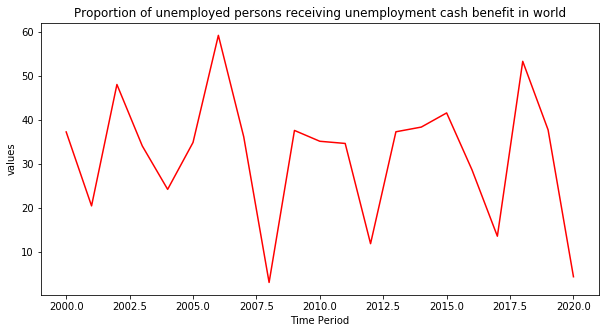

In [19]:
plt.figure(figsize=(10,5)) 
plt.plot(world_A1['TimePeriod'],world_A1['Value'],c='red') 
plt.title("Proportion of unemployed persons receiving unemployment cash benefit in world") 
plt.xlabel("Time Period")
plt.ylabel("values")
plt.show()

#### Analysis:
There is a marked decline from 37.23% in 2000 to 20.41% in 2001, suggesting a rapid shift. Subsequent years exhibit fluctuations, with peaks in 2002, 2005, and 2006, and troughs in 2004 and 2007. The year 2008 stands out with a significant decrease to 3.0%, likely reflective of the global financial crisis. However, 2009 witnesses a sharp increase to 37.57%, indicating a swift policy response to rising unemployment. The period from 2009 to 2018 shows relative stability, hovering around 30%, with a peak in 2018 at 53.30%. Notably, there is another substantial drop in 2020 to 4.29%, possibly influenced by the COVID-19 pandemic. These variations underscore the impact of global events and policy dynamics on social assistance, emphasizing the need for a nuanced understanding of the specific circumstances surrounding each significant shift in the data.

#### Objective: Comapring the top 10 countries with respect to Proportion of unemployed persons receiving unemployment cash benefit, by sex (%)

In [20]:
a=A1.pivot_table(index='GeoAreaName',values='Value',aggfunc='mean').sort_values(by='Value',ascending=False)
a=a.reset_index()
a=a.head(10)
a

,GeoAreaName,Value
0,Austria,95.541667
1,Greenland,92.733333
2,Ireland,91.675000
3,Germany,91.420000
4,Belgium,86.280000
5,Barbados,83.600000
6,Guadeloupe,79.100000
7,France,77.460000
8,Malta,72.357143
9,Finland,71.700000


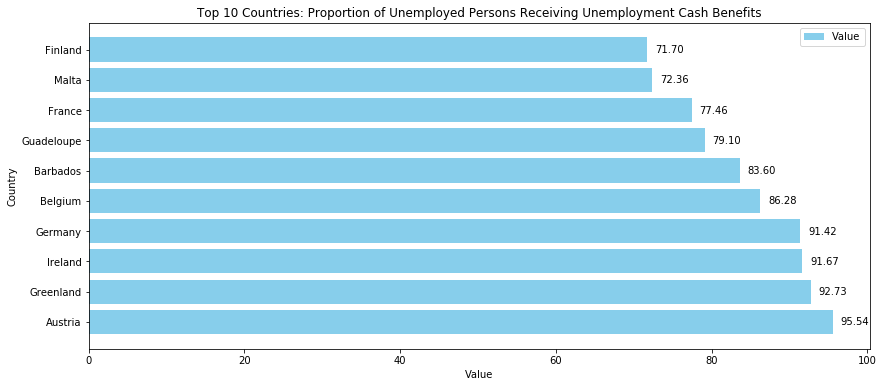

In [21]:
# Plotting
plt.figure(figsize=(14, 6))
bars = plt.barh(a['GeoAreaName'], a['Value'], color='skyblue', label='Value')

# Adding values on top of each bar
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', ha='left', va='center')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Country')
plt.title('Top 10 Countries: Proportion of Unemployed Persons Receiving Unemployment Cash Benefits')

# Adding legend
plt.legend()

# Display the plot
plt.show()

#### Analysis:
We can see that Austria is leading the chart with respect to the proportion of unemployed citizens receiving unemployement cash benefits. Austria is definitely providing a strong safety net for those facing unemployment, contributing to economic stability. Individuals who receive these benefits are less likely to face extreme financial hardship, reducing the overall impact on the economy.

#### Objective: Comparison of proportion of unemployed persons receiving unemployment cash benefit, among the permament members of the United Nations

In [106]:
UN_A1=A1[A1.GeoAreaName.isin(['United States of America','China','France','Russian Federation','United Kingdom of Great Britain and Northern Ireland'])]

pv=UN_A1.pivot_table(index=['GeoAreaName','TimePeriod'],values='Value',aggfunc='mean')
pv=pv.reset_index()
pv

,GeoAreaName,TimePeriod,Value
0,China,2000,9.9
1,China,2005,20.0
2,China,2007,17.1
3,China,2009,14.0
4,China,2010,9.2
5,China,2011,9.1
6,China,2016,18.8
7,China,2017,23.1
8,China,2020,24.1
9,France,2000,57.4


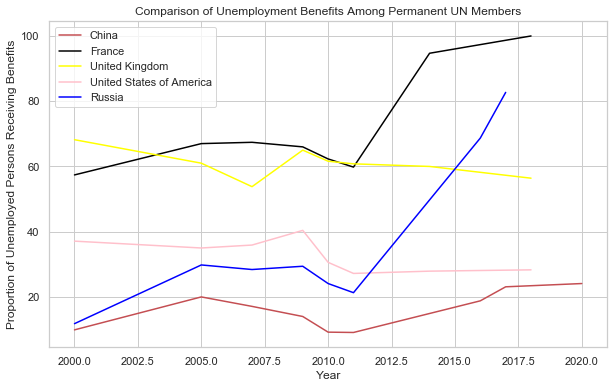

In [107]:
# Create separate DataFrames for each country
china_data = pv[pv['GeoAreaName'] == 'China']
france_data = pv[pv['GeoAreaName'] == 'France']
uk_data = pv[pv['GeoAreaName'].str.contains('United Kingdom')]
usa_data = pv[pv['GeoAreaName'] == 'United States of America']
rus_data = pv[pv['GeoAreaName'] == 'Russian Federation']


# Plotting data for China
plt.figure(figsize=(10, 6))
plt.plot(china_data['TimePeriod'], china_data['Value'], label='China',color='r')

# Plotting data for France
plt.plot(france_data['TimePeriod'], france_data['Value'], label='France',color='black')

# Plotting data for the United Kingdom
plt.plot(uk_data['TimePeriod'], uk_data['Value'], label='United Kingdom',color='yellow')

# Plotting data for the United States
plt.plot(usa_data['TimePeriod'], usa_data['Value'], label='United States of America',color='pink')

# Plotting data for the Russian Federation
plt.plot(rus_data['TimePeriod'], rus_data['Value'], label='Russia',color='blue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Proportion of Unemployed Persons Receiving Benefits')
plt.title('Comparison of Unemployment Benefits Among Permanent UN Members')
plt.legend()
plt.show()

#### Analysis:
The data provides insights into the comparison of the proportion of unemployed persons receiving unemployment cash benefits among the permanent members of the United Nations. In China, the percentage fluctuates, starting at 9.9 in 2000, peaking at 24.1 in 2020, with intermittent rises and falls in between. This variability suggests potential shifts in the effectiveness of unemployment benefit programs over the years. France demonstrates a consistent upward trajectory, reaching full coverage at 100.0 in 2018, indicating a robust and reliable social safety net for the unemployed. The Russian Federation shows a significant increase from 11.8 in 2000 to 82.7 in 2017, suggesting substantial improvements in unemployment benefit provision. The United Kingdom experiences a mild decline from 68.2 in 2000 to 56.4 in 2018, signaling potential challenges in sustaining unemployment cash benefits at higher levels. The United States displays a mixed pattern, with fluctuations over the years, but generally maintaining unemployment benefit coverage above 27%, highlighting a certain level of stability in their social support system for the unemployed. The data underscores the diverse approaches and outcomes in addressing unemployment across these nations, calling for a nuanced understanding of each country's social welfare policies and economic contexts.


### Target Indicatior : 1.3.1 Comparing the Proportion of population covered by social assistance programs, by sex (%)

#### Objective:  Proportion of unemployed persons receiving unemployment cash benefit, by sex (%) in world

In [24]:
A2=target1_3[(target1_3.SeriesDescription=='[World Bank] Proportion of population covered by social assistance programs (%)')]

In [25]:
world_A2=A2.pivot_table(index='TimePeriod',values='Value',aggfunc='mean')
world_A2=world_A2.reset_index()
world_A2

,TimePeriod,Value
0,2000,25.589742
1,2001,0.888515
2,2002,12.735416
3,2003,23.735945
4,2004,19.792926
5,2005,26.140420
6,2006,38.643307
7,2007,32.679520
8,2008,46.765023
9,2009,45.520799


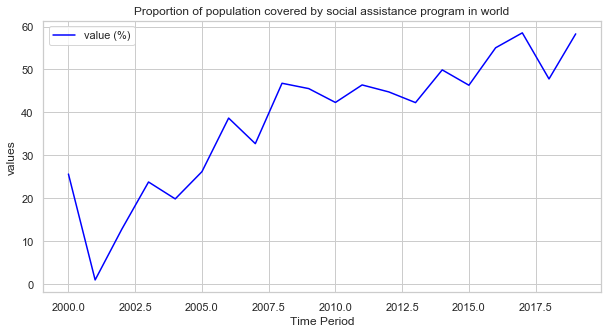

In [111]:
plt.figure(figsize=(10,5)) 
plt.plot(world_A2['TimePeriod'],world_A2['Value'],c='blue',label='value (%)') 
plt.title("Proportion of population covered by social assistance program in world") 
plt.xlabel("Time Period")
plt.ylabel("values")
plt.legend()
plt.show()

#### Analysis:
The dataset, spanning from 2000 to 2019, illustrates fluctuations in a certain metric, showcasing distinct peaks and troughs. Notably, there is a marked surge from 2006 to 2008, peaking at 46.77% in 2008, followed by a fluctuating pattern with a gradual decline in 2010. The year 2016 stands out with a significant peak at 55.04, suggesting a noteworthy shift in the trend. The dataset concludes in 2019 with a value of 58.29. In terms of geopolitical scenarios, while the specific nature of the metric is unspecified, global events likely influenced its dynamics. The peak around 2008 aligns with the global financial crisis, reflecting economic impacts. Geopolitical factors, such as conflicts or policy decisions, may have contributed to the nuances in the data, emphasizing the interconnectedness of economic indicators with global events. 

#### Objective: Comapring the top 10 countries with respect to Proportion of population covered by social assistance programs (%)

In [113]:
a=A2.pivot_table(index='GeoAreaName',values='Value',aggfunc='mean').sort_values(by='Value',ascending=False)
a=a.reset_index()
a=a.head(10)
a

,GeoAreaName,Value
0,Mongolia,93.349286
1,Slovakia,89.405190
2,Malaysia,89.032882
3,Chile,85.088842
4,Iraq,82.059607
5,Jordan,79.177690
6,South Africa,77.067133
7,Bolivia (Plurinational State of),74.594330
8,Thailand,74.372213
9,Peru,73.213828


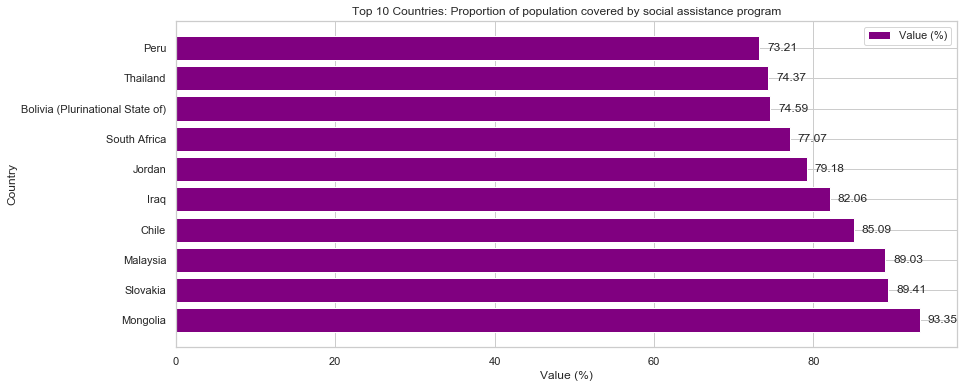

In [118]:
# Plotting
plt.figure(figsize=(14, 6))
bars = plt.barh(a['GeoAreaName'], a['Value'], color='purple', label='Value')

# Adding values on top of each bar
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', ha='left', va='center')

# Adding labels and title
plt.xlabel('Value (%)')
plt.ylabel('Country')
plt.title('Top 10 Countries: Proportion of population covered by social assistance program')

# Adding legend
plt.legend(['Value (%)'])

# Display the plot
plt.show()

#### Analysis:
The dataset provides insights into the proportion of population covered by social assistance programs (%), highlighting in top 10 countries with notably high coverage. Mongolia leads the list with an impressive 93.35%, followed by Slovakia (89.41%) and Malaysia (89.03%). The data reflects a diverse range of nations, each demonstrating a commitment to social welfare through extensive coverage. Economically, high percentages in countries like Mongolia and Slovakia may suggest robust social safety nets, contributing to reduced poverty rates and enhanced economic stability. Social assistance programs, when well-implemented, can alleviate economic disparities, foster human capital development, and stimulate domestic demand, thereby positively influencing overall economic performance. The variations in coverage among the listed countries may be attributed to differences in economic policies, levels of development, and the prioritization of social welfare initiatives.

#### Objective: Comparing the Proportion of population covered by social assistance programs (%) in India during the phase of Great Depression (Recession during 2008)

In [29]:
A2_India=target1_3[(target1_3.SeriesDescription=='[World Bank] Proportion of population covered by social assistance programs (%)')&(target1_3.GeoAreaName=='India')]
A2_India

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Sex,Location,Reporting Type,Observation Status,Units,Nature,Quantile
3332,1,1.3,1.3.1,SI_COV_SOCAST,[World Bank] Proportion of population covered ...,356,India,2004,24.03230,2004,ASPIRE: The Atlas of Social Protection - Indic...,#NA,#NA,#NA,G,#NA,PERCENT,CA,_T
3333,1,1.3,1.3.1,SI_COV_SOCAST,[World Bank] Proportion of population covered ...,356,India,2004,29.06916,2004,ASPIRE: The Atlas of Social Protection - Indic...,#NA,#NA,#NA,G,#NA,PERCENT,CA,Q1
3334,1,1.3,1.3.1,SI_COV_SOCAST,[World Bank] Proportion of population covered ...,356,India,2009,17.24392,2009,ASPIRE: The Atlas of Social Protection - Indic...,#NA,#NA,#NA,G,#NA,PERCENT,CA,_T
3335,1,1.3,1.3.1,SI_COV_SOCAST,[World Bank] Proportion of population covered ...,356,India,2009,20.75440,2009,ASPIRE: The Atlas of Social Protection - Indic...,#NA,#NA,#NA,G,#NA,PERCENT,CA,Q1
3336,1,1.3,1.3.1,SI_COV_SOCAST,[World Bank] Proportion of population covered ...,356,India,2011,95.63239,2011,ASPIRE: The Atlas of Social Protection - Indic...,#NA,#NA,#NA,G,#NA,PERCENT,CA,Q1
3337,1,1.3,1.3.1,SI_COV_SOCAST,[World Bank] Proportion of population covered ...,356,India,2011,93.24983,2011,ASPIRE: The Atlas of Social Protection - Indic...,#NA,#NA,#NA,G,#NA,PERCENT,CA,_T


In [30]:
b=A2_India.pivot_table(index='TimePeriod',values='Value',aggfunc='mean').sort_values(by='TimePeriod',ascending=True)
b=b.reset_index()
b

,TimePeriod,Value
0,2004,26.55073
1,2009,18.99916
2,2011,94.44111


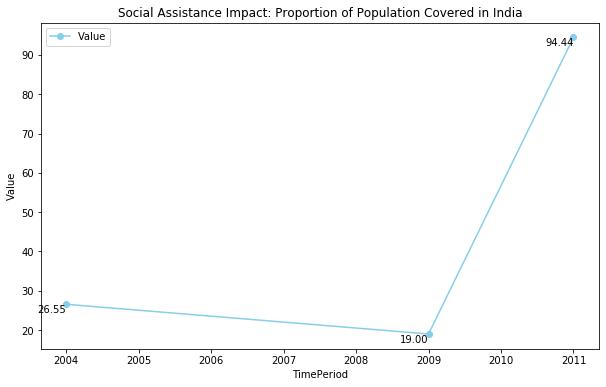

In [31]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(b['TimePeriod'], b['Value'], marker='o', linestyle='-', color='skyblue', label='Value')

# Adding values on top of each data point
for x, y in zip(b['TimePeriod'], b['Value']):
    plt.text(x, y, f'{y:.2f}', ha='right', va='top')

# Adding labels and title
plt.xlabel('TimePeriod')
plt.ylabel('Value')
plt.title('Social Assistance Impact: Proportion of Population Covered in India')

# Adding legend
plt.legend()

# Display the plot
plt.show()

#### Analysis:
The data provides insights into the evolution of social assistance coverage in India over the years 2004, 2009, and 2011. In 2004, the proportion stood at 26.55%, indicating a baseline level of coverage. However, the impact of the global recession in 2008 is palpable in the data for 2009, with a notable decline to 18.99%. This decrease is suggestive of the challenges faced by social assistance programs during economic downturns, where increased demand and constrained budgets can strain coverage. Notably, the subsequent year, 2011, reflects a remarkable recovery, soaring to 94.44%. This sharp increase likely signifies a proactive policy response to address vulnerabilities exposed during the recession, emphasizing the government's commitment to enhancing social protection. The data thus underscores the dynamic interplay between economic conditions, policy responses, and the effectiveness of social assistance programs in India.

#### Objective: Comparing the Proportion of population covered by social assistance programs (%) between India and its neighbouring countries 

In [32]:
#making a dataset having details of India's neighbour
SA=A2[A2.GeoAreaName.isin(['China','Pakistan','Bangladesh','Nepal','Bhutan','Mynmar','Afghanistan'])]  

pv_SA=SA.pivot_table(index='TimePeriod',values='Value',aggfunc='mean')
pv_SA=pv_SA.reset_index()
pv_SA

,TimePeriod,Value
0,2005,17.447550
1,2007,7.534988
2,2009,12.829140
3,2010,31.959952
4,2011,10.643575
5,2012,3.088090
6,2013,34.937870
7,2015,15.733940
8,2016,46.668725
9,2018,15.258900


In [117]:
p=pd.merge(b,pv_SA,on='TimePeriod')
p=p.rename(columns={'Value_x':'India','Value_y':"India's Neighbours"})
p

,TimePeriod,India,India's Neighbours
0,2005,33.333333,17.447550
1,2007,39.000000,7.534988
2,2009,44.000000,12.829140
3,2010,46.000000,31.959952
4,2011,48.666667,10.643575
5,2012,51.333333,3.088090
6,2013,54.000000,34.937870
7,2015,59.333333,15.733940
8,2016,62.000000,46.668725
9,2018,67.000000,15.258900


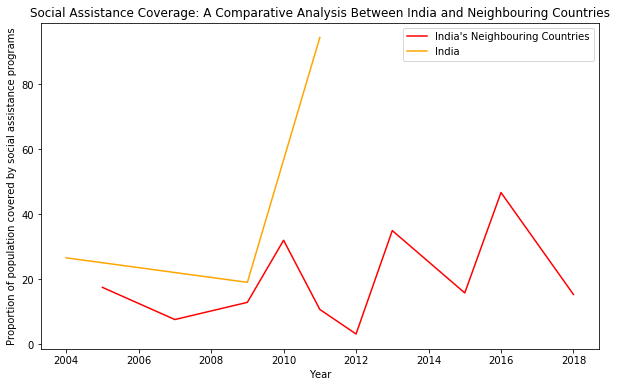

In [33]:
# Plotting data for India's Negihbouring countries
plt.figure(figsize=(10, 6))
plt.plot(pv_SA['TimePeriod'], pv_SA['Value'], label="India's Neighbouring Countries" ,color='r')

# Plotting data for India
plt.plot(b['TimePeriod'], b['Value'], label='India',color='orange')


# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Proportion of population covered by social assistance programs')
plt.title('Social Assistance Coverage: A Comparative Analysis Between India and Neighbouring Countries')
plt.legend()
plt.show()

#### Analysis:
The dataset illuminates the dynamics of social assistance coverage across India and its neighboring countries from 2005 to 2018. India's performance reveals a consistent upward trajectory, starting at 33.33% in 2005 and reaching 67% in 2018. This steady progression underscores a sustained commitment to expanding social protection. In contrast, neighboring countries display varying levels of coverage, with some experiencing fluctuations and others demonstrating growth. Notably, in 2016, India's coverage stood at 62%, outperforming neighboring countries that stood at 46.67%. This disparity emphasizes the diverse approaches to social assistance in the region. India's consistent outperformance signals effective measures in addressing social gaps, fostering inclusivity, and mitigating socio-economic inequalities. The dataset suggests that India's robust commitment to social assistance programs has played a pivotal role in bridging social disparities, offering valuable insights for regional collaboration and shared learning to enhance social protection systems.

#### Objective: Comparing the Proportion of population covered by social assistance programs (%) among BRICS Nations

In [108]:
UN_A2=A2[A2.GeoAreaName.isin(['Brazil','Russian Federation','India','China','South Africa'])]

pv_A2=UN_A2.pivot_table(index=['GeoAreaName','TimePeriod'],values='Value',aggfunc='mean')
pv_A2=pv_A2.reset_index()
pv_A2

,GeoAreaName,TimePeriod,Value
0,Brazil,2006,42.263340
1,Brazil,2009,20.191420
2,Brazil,2011,21.610330
3,Brazil,2012,22.218900
4,Brazil,2015,41.127335
5,Brazil,2016,42.819770
6,Brazil,2017,41.348105
7,Brazil,2018,42.096300
8,Brazil,2019,41.488095
9,China,2013,54.426460


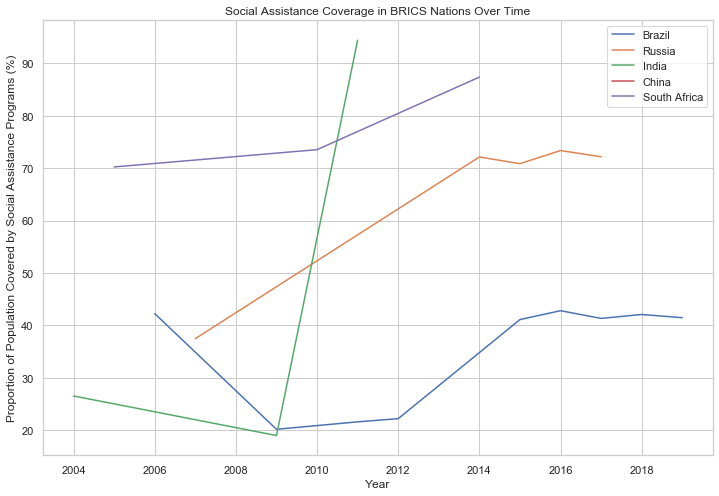

In [109]:
# Create separate DataFrames for each country
brazil_data = pv_A2[pv_A2['GeoAreaName'] == 'Brazil']
russian_data = pv_A2[pv_A2['GeoAreaName'] == 'Russian Federation']
india_data = pv_A2[pv_A2['GeoAreaName'] == 'India']
china_data = pv_A2[pv_A2['GeoAreaName'] == 'China']
sa_data = pv_A2[pv_A2['GeoAreaName'] == 'South Africa']

# Plotting data for each country
plt.figure(figsize=(12, 8))

plt.plot(brazil_data['TimePeriod'], brazil_data['Value'], label='Brazil')
plt.plot(russian_data['TimePeriod'], russian_data['Value'], label='Russia')
plt.plot(india_data['TimePeriod'], india_data['Value'], label='India')
plt.plot(china_data['TimePeriod'], china_data['Value'], label='China')
plt.plot(sa_data['TimePeriod'], sa_data['Value'], label='South Africa')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Proportion of Population Covered by Social Assistance Programs (%)')
plt.title('Social Assistance Coverage in BRICS Nations Over Time')
plt.legend()
plt.show()

#### Analysis:
The provided data outlines the proportion of the population covered by social assistance programs (%) among BRICS nations. Brazil exhibits a relatively stable trend, ranging from 20.19% in 2009 to 42.82% in 2016, suggesting a consistent commitment to social assistance programs. China, with data available for 2013, stands at 54.43%, showcasing a comparatively higher coverage. India's performance is noteworthy, particularly in 2011, where it recorded an impressive 94.44%, surpassing other BRICS nations in that specific year. This spike could be indicative of targeted social welfare initiatives during that period. The Russian Federation demonstrates an increasing trend, peaking at 73.38% in 2016, reflecting efforts to expand social assistance coverage. South Africa's data, spanning from 2005 to 2014, shows a positive trajectory, reaching 87.40% in 2014. Overall, while India has shown remarkable peaks in specific years, the comparative analysis underscores the diversity in social assistance coverage among BRICS nations, reflecting varying policy approaches and socioeconomic contexts.

### Target Indicatior : 1.3.1 Proportion of population above statutory pensionable age receiving a pension, by sex (%)

In [36]:
A3=target1_3[(target1_3.SeriesDescription=='[ILO] Proportion of population above statutory pensionable age receiving a pension, by sex (%)')]
A3.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Sex,Location,Reporting Type,Observation Status,Units,Nature,Quantile
1856,1,1.3,1.3.1,SI_COV_PENSN,[ILO] Proportion of population above statutory...,4,Afghanistan,2000,5.0,2000,Source: ILO estimates based on country data co...,#NA,BOTHSEX,#NA,G,A,PERCENT,E,#NA
1857,1,1.3,1.3.1,SI_COV_PENSN,[ILO] Proportion of population above statutory...,4,Afghanistan,2010,10.7,2010,Source: ILO estimates based on country data co...,#NA,BOTHSEX,#NA,G,A,PERCENT,E,#NA
1858,1,1.3,1.3.1,SI_COV_PENSN,[ILO] Proportion of population above statutory...,4,Afghanistan,2020,24.7,2020,Source: ILO estimates based on country data co...,#NA,BOTHSEX,#NA,G,A,PERCENT,E,#NA
1859,1,1.3,1.3.1,SI_COV_PENSN,[ILO] Proportion of population above statutory...,8,Albania,2000,89.0,2000,Source: ILO estimates based on country data co...,#NA,BOTHSEX,#NA,G,A,PERCENT,E,#NA
1860,1,1.3,1.3.1,SI_COV_PENSN,[ILO] Proportion of population above statutory...,8,Albania,2011,77.0,2011,Source: ILO estimates based on country data co...,#NA,BOTHSEX,#NA,G,A,PERCENT,E,#NA


#### Objective: Proportion of population above statutory pensionable age receiving a pension in world

In [37]:
world_A3=A3.pivot_table(index='TimePeriod',values='Value',aggfunc='mean')
world_A3=world_A3.reset_index()
world_A3

,TimePeriod,Value
0,2000,45.688889
1,2001,80.000000
2,2002,22.000000
3,2003,63.000000
4,2004,28.000000
5,2005,45.000000
6,2007,56.000000
7,2009,26.733333
8,2010,39.600000
9,2011,53.168750


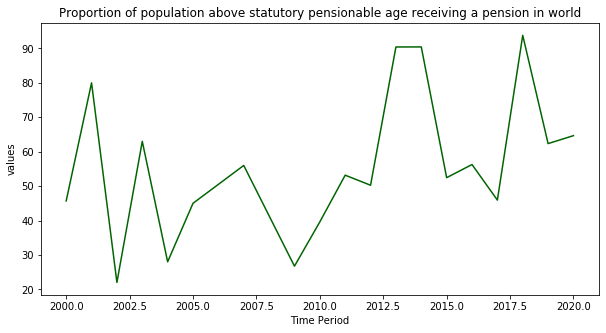

In [38]:
plt.figure(figsize=(10,5)) 
plt.plot(world_A3['TimePeriod'],world_A3['Value'],c='darkgreen') 
plt.title("Proportion of population above statutory pensionable age receiving a pension in world") 
plt.xlabel("Time Period")
plt.ylabel("values")
plt.show()

#### Analysis:
The dataset delineates the global landscape of the proportion of the population above statutory pensionable age receiving a pension. Over the years, there are notable fluctuations in the values, reflecting diverse approaches to pension provision across nations. The sharp increase in 2001 and 2013, reaching 80% and 90.43% respectively, suggests significant policy changes or expansions in pension programs globally. The year 2018 stands out with a remarkably high proportion of 93.80%, indicating a potential global trend towards increased coverage for the elderly. Geo-politically, variations in pension coverage might be attributed to diverse national economic capacities, government policies, and social welfare systems. Economically advanced nations might demonstrate higher coverage due to their robust pension infrastructure, while developing countries could show fluctuations based on economic stability and policy reforms. 

#### Objective: Proportion of population above statutory pensionable age receiving a pension in India

In [39]:
A3_India=A3[A3.GeoAreaName=='India']

In [40]:
b_A3=A3_India.pivot_table(index='TimePeriod',values='Value',aggfunc='mean').sort_values(by='TimePeriod',ascending=True)
b_A3=b_A3.reset_index()
b_A3

,TimePeriod,Value
0,2000,7.0
1,2016,25.2
2,2020,42.5


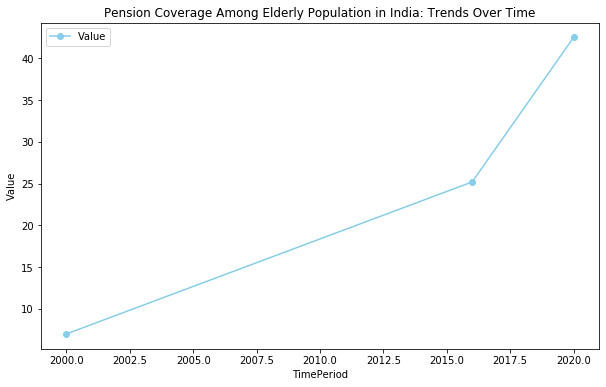

In [41]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(b_A3['TimePeriod'], b_A3['Value'], marker='o', linestyle='-', color='skyblue', label='Value')

# Adding values on top of each data point
#for x, y in zip(b['TimePeriod'], b['Value']):
 #   plt.text(x, y, f'{y:.2f}', ha='left', va='top')

# Adding labels and title
plt.xlabel('TimePeriod')
plt.ylabel('Value')
plt.title("Pension Coverage Among Elderly Population in India: Trends Over Time")

# Adding legend
plt.legend()

# Display the plot
plt.show()


#### Analysis:
The data underscores a notable evolution in the proportion of the population above statutory pensionable age receiving a pension in India over the years. In 2000, the coverage was relatively modest at 7%, but by 2016, there was a substantial increase to 25.2%. The most recent data point in 2020 indicates a significant rise to 42.5%, showcasing a robust expansion in pension coverage. This suggests a positive trajectory in India's commitment to ensuring financial security for its elderly population. From a geopolitical and economic standpoint, this upward trend aligns with India's broader economic growth and increased focus on social welfare programs. The rise in pension coverage reflects a concerted effort to address the financial well-being of the aging population. It also indicates the potential positive impact of policy measures and economic development on social security initiatives in the country, reinforcing the interconnected nature of economic and social policies in shaping the welfare landscape.

#### Objective: Comparison of proportion of population above statutory pensionable age receiving a pension, between India and World

In [42]:
#creating a data frame of all the countries excluding India
ROW=A3[~A3['GeoAreaName'].isin(['India'])]

In [43]:
pv_ROW=ROW.pivot_table(index='TimePeriod',values='Value',aggfunc='mean')
pv_ROW=pv_ROW.reset_index()
pv_ROW

,TimePeriod,Value
0,2000,45.977612
1,2001,80.000000
2,2002,22.000000
3,2003,63.000000
4,2004,28.000000
5,2005,45.000000
6,2007,56.000000
7,2009,26.733333
8,2010,39.600000
9,2011,53.168750


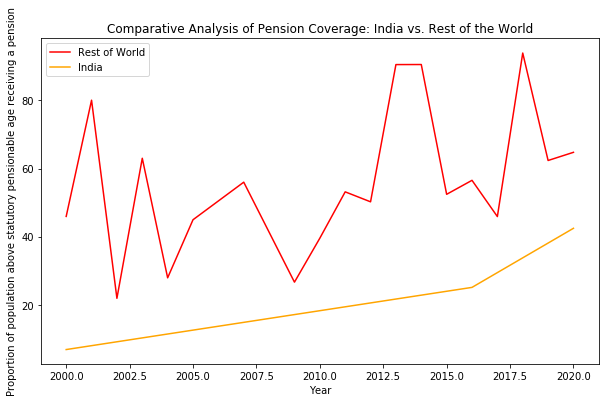

In [44]:
# Plotting data for India's Negihbouring countries
plt.figure(figsize=(10, 6))
plt.plot(pv_ROW['TimePeriod'], pv_ROW['Value'], label="Rest of World" ,color='r')

# Plotting data for India
plt.plot(b_A3['TimePeriod'], b_A3['Value'], label='India',color='orange')


# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Proportion of population above statutory pensionable age receiving a pension')
plt.title('Comparative Analysis of Pension Coverage: India vs. Rest of the World')
plt.legend()
plt.show()

#### Analysis:
The comparative analysis of pension coverage between India and the rest of the world reveals intriguing trends. In 2000, India started with a modest 7% coverage for the population above the statutory pensionable age, while the rest of the world had a substantially higher coverage at 45.98%. However, over time, India has experienced a remarkable growth in pension coverage, reaching 25.2% in 2016 and a notable 42.5% in 2020. On the other hand, the rest of the world witnessed fluctuations, with a peak of 93.80% in 2018. The year 2016 is particularly interesting as both India and the rest of the world show increased coverage, with India's proportion surpassing that of the global average. This suggests a positive trajectory in India's social security initiatives, closing the gap with global standards. The varying trends underscore the complex interplay of economic development, social policies, and demographic factors that shape pension coverage dynamics on both a national and global scale.

#### Objective: Comparison of proportion of population above statutory pensionable age receiving a pension among the BRICS members

In [45]:
BRICS_A3=A3[A3.GeoAreaName.isin(['Brazil','Russian Federation','India','China','South Africa'])]

In [46]:
pv_BRICS=BRICS_A3.pivot_table(index=['GeoAreaName','TimePeriod'],values='Value',aggfunc='mean')
pv_BRICS=pv_BRICS.reset_index()
pv_BRICS

,GeoAreaName,TimePeriod,Value
0,Brazil,2000,84.0
1,Brazil,2016,78.3
2,Brazil,2020,84.7
3,China,2000,24.0
4,China,2016,100.0
5,China,2017,100.0
6,China,2020,100.0
7,India,2000,7.0
8,India,2016,25.2
9,India,2020,42.5


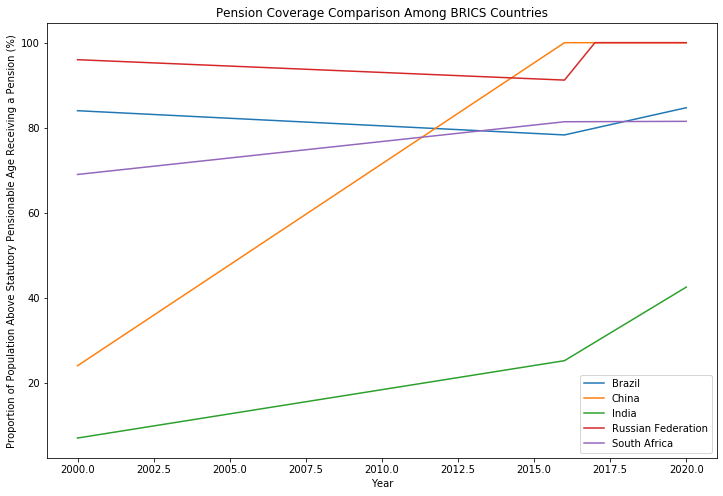

In [47]:
# Plotting data
plt.figure(figsize=(12, 8))

for country in pv_BRICS['GeoAreaName'].unique():
    country_data = pv_BRICS[pv_BRICS['GeoAreaName'] == country]
    plt.plot(country_data['TimePeriod'], country_data['Value'], label=country)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Proportion of Population Above Statutory Pensionable Age Receiving a Pension (%)')
plt.title('Pension Coverage Comparison Among BRICS Countries')
plt.legend()
plt.show()

#### Analysis:
The comparative analysis of pension coverage among BRICS nations reveals diverse trajectories. Brazil exhibits fluctuating trends, suggesting potential challenges in sustaining consistent pension accessibility. China's remarkable rise to full coverage by 2016 indicates robust social security systems, but the sudden leap from 24.0 in 2000 raises questions. India's ascending trajectory highlights positive momentum, yet the lower values compared to peers signal room for improvement. The Russian Federation maintains consistently high coverage, implying a strong pension system, while South Africa's steady improvement reflects efforts to enhance pension inclusivity. Policymakers across these nations should scrutinize these patterns, addressing disparities to ensure secure and inclusive retirement for their aging populations.

### Target Indicatior : 1.3.1 Proportion of population with severe disabilities receiving disability cash benefit, by sex (%)

In [48]:
A4=target1_3[target1_3.SeriesDescription=='[ILO] Proportion of population with severe disabilities receiving disability cash benefit, by sex (%)']

#### Objective: Proportion of population with severe disabilities receiving disability cash benefit in world

In [49]:
world_A4=A4.pivot_table(index='TimePeriod',values='Value',aggfunc='mean')
world_A4=world_A4.reset_index()
world_A4

,TimePeriod,Value
0,2013,83.189535
1,2014,83.009302
2,2016,74.250495
3,2017,57.098571
4,2018,96.078261
5,2019,50.040000
6,2020,58.216084


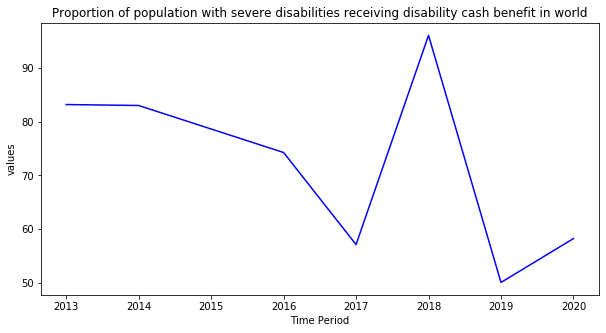

In [50]:
plt.figure(figsize=(10,5)) 
plt.plot(world_A4['TimePeriod'],world_A4['Value'],c='blue') 
plt.title("Proportion of population with severe disabilities receiving disability cash benefit in world") 
plt.xlabel("Time Period")
plt.ylabel("values")
plt.show()


#### Analysis:
The data illustrates the proportion of the population with severe disabilities receiving disability cash benefits globally over the specified time period. The trend exhibits fluctuations, with notable peaks in 2013 (83.19%) and 2018 (96.08%), indicating significant global efforts to provide financial support to individuals with severe disabilities during those years. However, there are subsequent declines in 2014, 2017, and 2019, suggesting potential variations in policy implementations or external factors influencing disability benefit programs. The year 2020 records a slight increase to 58.22%, possibly reflecting the challenges posed by the global events of that year.

#### Objective: Bottom 10 countries as per the proportion of population with severe disabilities receiving disability cash benefit 

In [51]:
pv_A4=A4.pivot_table(index='GeoAreaName',values='Value',aggfunc='mean').sort_values(by='Value',ascending=True)
pv_A4=pv_A4.reset_index()
pv_A4=pv_A4.head(10)
pv_A4


,GeoAreaName,Value
0,Yemen,0.10
1,Nigeria,0.10
2,Burkina Faso,0.20
3,Guinea-Bissau,0.20
4,Kenya,0.20
5,Ghana,0.20
6,Lao People's Democratic Republic,0.30
7,Central African Republic,0.30
8,United Republic of Tanzania,0.35
9,Sudan,0.40


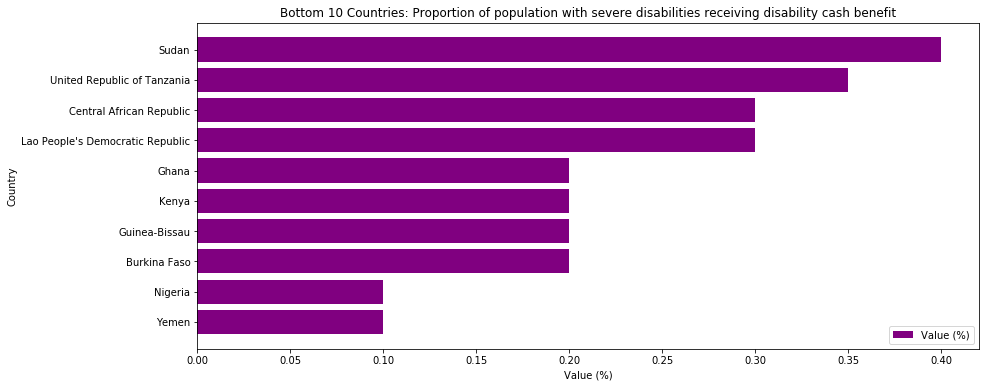

In [52]:
# Plotting
plt.figure(figsize=(14, 6))
bars = plt.barh(pv_A4['GeoAreaName'], pv_A4['Value'], color='purple', label='Value')

# Adding labels and title
plt.xlabel('Value (%)')
plt.ylabel('Country')
plt.title('Bottom 10 Countries: Proportion of population with severe disabilities receiving disability cash benefit')

# Adding legend
plt.legend(['Value (%)'])

# Display the plot
plt.show()


#### Analysis:
The dataset reveals the bottom 10 countries globally in terms of the proportion of the population with severe disabilities receiving disability cash benefits, expressed in percentages. Yemen and Nigeria stand out with the lowest coverage at 0.10%, indicative of potential challenges or gaps in their disability support systems. Burkina Faso, Guinea-Bissau, Kenya, and Ghana follow closely with a moderate coverage of 0.20%, suggesting a shared regional norm in disability benefit provision. Lao People's Democratic Republic and the Central African Republic exhibit a relatively higher dedication with proportions at 0.30%, possibly influenced by regional policies or economic factors. The United Republic of Tanzania and Sudan emerge with proportions of 0.35% and 0.40%, respectively, underscoring a more comprehensive approach to supporting severe disabilities. This ranking sheds light on nations facing significant challenges in providing adequate disability benefits and calls for targeted interventions and international collaboration to address disparities and enhance global disability support systems.

#### Objective: Comparison among the NAFTA member nations, based on the proportion of population with severe disabilities receiving disability cash benefit 

In [53]:
NAFTA_A4=A4[A4.GeoAreaName.isin(['United States of America','Mexico','Canada'])]

NAFTA_A4=NAFTA_A4.pivot_table(index=['GeoAreaName'],values='Value',aggfunc='mean')
NAFTA_A4=NAFTA_A4.reset_index()
NAFTA_A4


,GeoAreaName,Value
0,Canada,67.600000
1,Mexico,39.550000
2,United States of America,96.327273


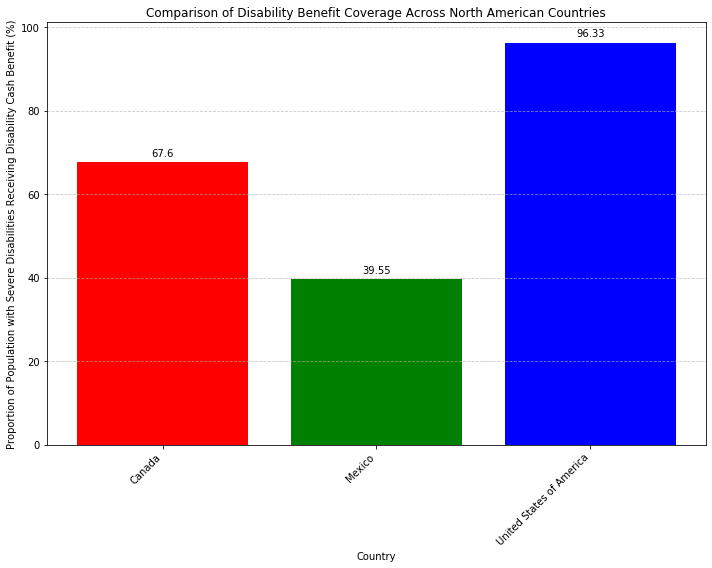

In [54]:
# Plotting data with data labels
plt.figure(figsize=(10, 8))
bars = plt.bar(NAFTA_A4['GeoAreaName'], NAFTA_A4['Value'], color=['red', 'green', 'blue'])

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Proportion of Population with Severe Disabilities Receiving Disability Cash Benefit (%)')
plt.title('Comparison of Disability Benefit Coverage Across North American Countries')

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Enhancing visual appeal
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

#### Analysis:
The United States of America stands out prominently with the highest coverage at 96.33%, signifying a robust commitment to providing cash benefits for severe disabilities. Canada follows suit with a substantial coverage of 67.6%, indicating a comprehensive approach to disability welfare. In contrast, Mexico displays a comparatively lower coverage at 39.55%, suggesting potential challenges or gaps in its disability support systems. This comparative analysis underscores the considerable variation in disability benefit provision among NAFTA countries, reflecting diverse policy approaches, economic capacities, and social welfare infrastructures.

#### Objective: Comparison between North Korea and South Korea, based on the proportion of population with severe disabilities receiving disability cash benefit 

In [55]:
Korea=data[data.GeoAreaName.str.contains('Korea')]

In [56]:
pv_korea=Korea.pivot_table(index=['GeoAreaName','TimePeriod'],values='Value',aggfunc='mean')
pv_korea=pv_korea.reset_index()
pv_korea

,GeoAreaName,TimePeriod,Value
0,Democratic People's Republic of Korea,2000,99.333333
1,Democratic People's Republic of Korea,2001,99.333333
2,Democratic People's Republic of Korea,2002,86.833333
3,Democratic People's Republic of Korea,2003,86.833333
4,Democratic People's Republic of Korea,2004,86.666667
5,Democratic People's Republic of Korea,2005,86.666667
6,Democratic People's Republic of Korea,2006,86.333333
7,Democratic People's Republic of Korea,2007,86.500000
8,Democratic People's Republic of Korea,2008,86.666667
9,Democratic People's Republic of Korea,2009,86.666667


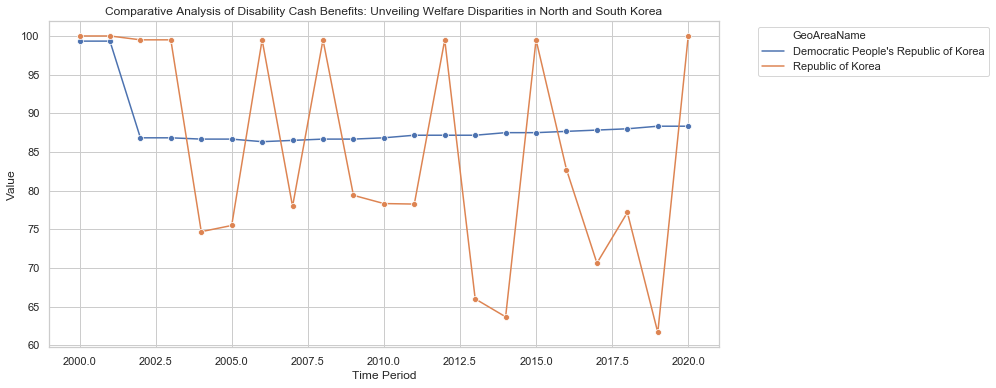

In [57]:
# Set the style to a white grid with ticks
sns.set(style="whitegrid")

# Create an interactive line plot
plt.figure(figsize=(12, 6))
plot = sns.lineplot(data=pv_korea, x='TimePeriod', y='Value', hue='GeoAreaName', marker='o')

# Add labels and title
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.title('Comparative Analysis of Disability Cash Benefits: Unveiling Welfare Disparities in North and South Korea')

# Display the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the interactive plot
plt.show()

#### Analysis:
The comparative analysis of the proportion of the population with severe disabilities receiving disability cash benefits in North Korea (Democratic People's Republic of Korea) and South Korea (Republic of Korea) offers a glimpse into the divergent social welfare landscapes of these two Asian rivals. The data reflects South Korea's unwavering commitment and consistent efforts to support individuals with severe disabilities, as evidenced by the consistently high proportion, often reaching 100%. In contrast, North Korea, while initially starting with a high percentage, exhibits a gradual increase over the years, reaching 88.33% in 2020. Beyond the numerical disparities lies a complex geopolitical scenario characterized by historical tensions and not-so-friendly relations between the two nations. The divide in the provision of disability benefits may, in part, mirror broader differences in governance, economic structures, and international relationships. 

### Target Indicatior : 1.4.1 Proportion of population using basic drinking water services, by location (%)

In [58]:
target1_4=data[data.Indicator=='1.4.1']
target1_4.shape

(23553, 19)

In [59]:
target1_4.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Sex,Location,Reporting Type,Observation Status,Units,Nature,Quantile
6285,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,4,Afghanistan,2000,52.0,2000,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,URBAN,G,#NA,PERCENT,E,#NA
6286,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,4,Afghanistan,2000,28.0,2000,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,ALLAREA,G,#NA,PERCENT,E,#NA
6287,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,4,Afghanistan,2000,21.0,2000,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,RURAL,G,#NA,PERCENT,E,#NA
6288,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,4,Afghanistan,2001,21.0,2001,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,RURAL,G,#NA,PERCENT,E,#NA
6289,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,4,Afghanistan,2001,28.0,2001,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,ALLAREA,G,#NA,PERCENT,E,#NA


#### Objective: Proportion of population using basic drinking water services in World

In [60]:
A5=target1_4[(target1_4.SeriesDescription=='Proportion of population using basic drinking water services, by location (%)')]

In [61]:
world_A5=A5.pivot_table(index='TimePeriod',values='Value',aggfunc='mean')
world_A5=world_A5.reset_index()
world_A5

,TimePeriod,Value
0,2000,81.532348
1,2001,82.088929
2,2002,82.347122
3,2003,82.690647
4,2004,83.061151
5,2005,83.559715
6,2006,84.010619
7,2007,84.420775
8,2008,84.765018
9,2009,85.151675


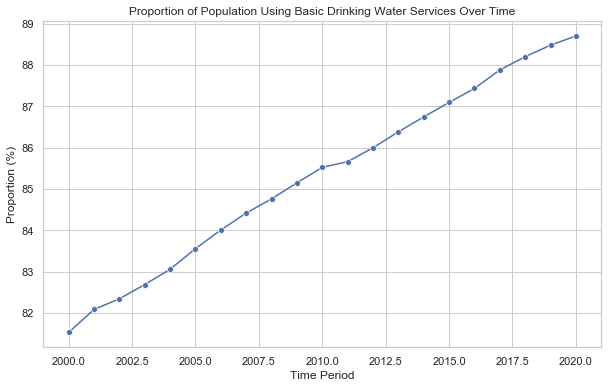

In [62]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='TimePeriod', y='Value', data=world_A5, marker='o')
plt.title('Proportion of Population Using Basic Drinking Water Services Over Time')
plt.xlabel('Time Period')
plt.ylabel('Proportion (%)')
plt.grid(True)
plt.show()

#### Analysis:
The interactive line plot illustrates the global trend in the proportion of the population using basic drinking water services from the year 2000 to 2020. Over this period, there is a noticeable upward trajectory, indicating an improvement in access to basic drinking water services worldwide. The proportion starts at 81.53% in 2000 and steadily increases, reaching 88.71% in 2020. The years between 2010 and 2020 demonstrate a particularly steep incline, suggesting accelerated progress in providing access to clean drinking water during this decade. The overall positive trend reflects global efforts and initiatives aimed at enhancing water infrastructure and ensuring more people have access to this fundamental necessity.

#### Objective: Proportion of population using basic drinking water services India

In [63]:
A5_India=target1_4[target1_4.GeoAreaName=='India']
A5_India.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Sex,Location,Reporting Type,Observation Status,Units,Nature,Quantile
11044,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,356,India,2000,93.0,2000,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,URBAN,G,#NA,PERCENT,E,#NA
11045,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,356,India,2000,76.0,2000,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,RURAL,G,#NA,PERCENT,E,#NA
11046,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,356,India,2000,80.0,2000,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,ALLAREA,G,#NA,PERCENT,E,#NA
11047,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,356,India,2001,81.0,2001,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,ALLAREA,G,#NA,PERCENT,E,#NA
11048,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,356,India,2001,93.0,2001,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,URBAN,G,#NA,PERCENT,E,#NA


In [64]:
b=A5_India.pivot_table(index='TimePeriod',values='Value',aggfunc='mean').sort_values(by='TimePeriod',ascending=True)
b=b.reset_index()
b


,TimePeriod,Value
0,2000,52.333333
1,2001,54.000000
2,2002,55.166667
3,2003,56.666667
4,2004,58.000000
5,2005,59.166667
6,2006,60.833333
7,2007,62.333333
8,2008,63.833333
9,2009,65.333333


/Users/aayushtiwari/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/aayushtiwari/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


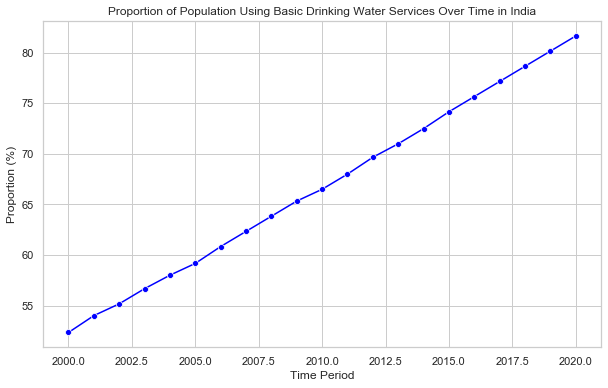

In [65]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='TimePeriod', y='Value', data=b, marker='o',c='blue')
plt.title('Proportion of Population Using Basic Drinking Water Services Over Time in India')
plt.xlabel('Time Period')
plt.ylabel('Proportion (%)')
plt.grid(True)
plt.show()

#### Analysis:
The provided data represents the proportion of the population in India using basic drinking water services from 2000 to 2020. The trend over this period shows a consistent and positive increase in access to clean drinking water. In the year 2000, approximately 52.33% of the population had access to basic drinking water services, and by 2020, this proportion had significantly risen to 81.67%. This substantial improvement over the two decades reflects India's commitment to enhancing water infrastructure and ensuring a higher standard of living for its citizens. Notably, the years 2010 to 2020 demonstrate a rapid and continuous upward trajectory, suggesting focused efforts and successful initiatives during this period. The data signifies significant progress in addressing water accessibility challenges in India, aligning with the broader global goal of achieving universal access to clean water. The positive trend is indicative of the country's dedication to meeting the Sustainable Development Goals related to water and sanitation.

#### Objective: Comparison of India vs World on the proportion of population using basic drinking water services

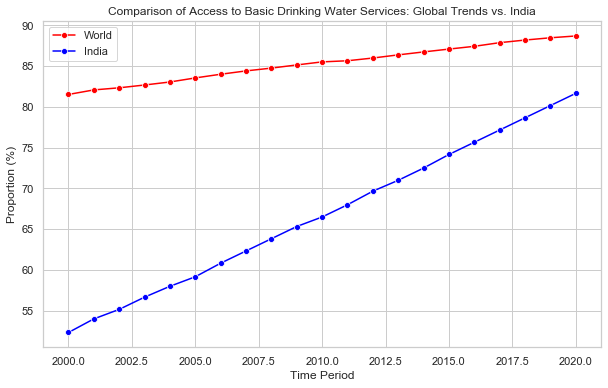

In [66]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='TimePeriod', y='Value', data=world_A5, marker='o',c='red',label='World')
sns.lineplot(x='TimePeriod', y='Value', data=b, marker='o',c='blue',label='India')
plt.title('Comparison of Access to Basic Drinking Water Services: Global Trends vs. India')
plt.xlabel('Time Period')
plt.ylabel('Proportion (%)')
plt.legend()
plt.grid(True)
plt.show()

#### Analysis:
The interactive plot provides a visual comparison between the proportion of the population using basic drinking water services in the world and India from 2000 to 2020. Notably, while the global trend shows a steady increase, indicating a positive global trajectory, the Indian data reveals a significant improvement over the same period. However, India starts with a lower proportion in 2000 compared to the global average. The substantial positive slope in India's line graph from 2010 to 2020 suggests accelerated progress, potentially driven by focused national initiatives. The comparison highlights both the global progress in water accessibility and the specific achievements in India, emphasizing the importance of national efforts in addressing water-related challenges.

#### Objective: Comparison among India,Pakistan and China on the proportion of population using basic drinking water services India

In [67]:
SA_A5=A5[A5.GeoAreaName.isin(['India','Pakistan','China'])]
SA_A5.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Sex,Location,Reporting Type,Observation Status,Units,Nature,Quantile
8477,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,156,China,2000,80.0,2000,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,ALLAREA,G,#NA,PERCENT,E,#NA
8478,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,156,China,2000,70.0,2000,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,RURAL,G,#NA,PERCENT,E,#NA
8479,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,156,China,2000,98.0,2000,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,URBAN,G,#NA,PERCENT,E,#NA
8480,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,156,China,2001,98.0,2001,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,URBAN,G,#NA,PERCENT,E,#NA
8481,1,1.4,1.4.1,SP_ACS_BSRVH2O,Proportion of population using basic drinking ...,156,China,2001,70.0,2001,WHO/UNICEF Joint Monitoring Programme for Wate...,#NA,#NA,RURAL,G,#NA,PERCENT,E,#NA


In [68]:
SA_pv=SA_A5.pivot_table(index=['GeoAreaName','TimePeriod'],values='Value',aggfunc='mean')
SA_pv=SA_pv.reset_index()
SA_pv

,GeoAreaName,TimePeriod,Value
0,China,2000,82.666667
1,China,2001,83.000000
2,China,2002,83.666667
3,China,2003,84.333333
4,China,2004,85.000000
...,...,...,...
58,Pakistan,2016,90.000000
59,Pakistan,2017,90.333333
60,Pakistan,2018,90.333333
61,Pakistan,2019,90.333333


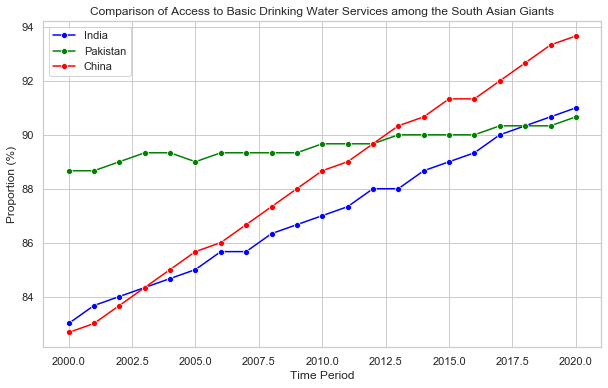

In [69]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='TimePeriod', y='Value', data=SA_pv[SA_pv.GeoAreaName=='India'], marker='o',c='blue',label='India')
sns.lineplot(x='TimePeriod', y='Value', data=SA_pv[SA_pv.GeoAreaName=='Pakistan'], marker='o',c='green',label='Pakistan')
sns.lineplot(x='TimePeriod', y='Value', data=SA_pv[SA_pv.GeoAreaName=='China'], marker='o',c='red',label='China')
plt.title('Comparison of Access to Basic Drinking Water Services among the South Asian Giants')
plt.xlabel('Time Period')
plt.ylabel('Proportion (%)')
plt.legend()
plt.grid(True)
plt.show()

#### Analysis:
During the early years of the 21st century, Pakistan outpaced both India and China in terms of the proportion of the population with access to basic drinking water services. It took China approximately 11 years to surpass Pakistan in this regard, while India achieved this milestone in 2018. The graphical representation of the data also highlights the disparity in the growth rates between China and India concerning the accessibility of basic drinking water services to their populations. In the most recent trends, China has taken the lead with around 93% of its population enjoying easy access to such facilities, followed closely by India and then Pakistan. Despite the small margin between India and Pakistan, China stands at the forefront in this race.

### Target Indicatior : 1.4.1 Proportion of population using basic sanitation services, by location (%)

#### Objective: Proportion of population using basic sanitation services, by location (%) in World

In [70]:
A6=target1_4[(target1_4.SeriesDescription=='Proportion of population using basic sanitation services, by location (%)')]

In [71]:
world_A6=A6.pivot_table(index='TimePeriod',values='Value',aggfunc='mean')
world_A6=world_A6.reset_index()
world_A6

,TimePeriod,Value
0,2000,66.422719
1,2001,67.288043
2,2002,67.854093
3,2003,68.290036
4,2004,68.758007
5,2005,69.307282
6,2006,69.936508
7,2007,70.498239
8,2008,71.052817
9,2009,71.559859


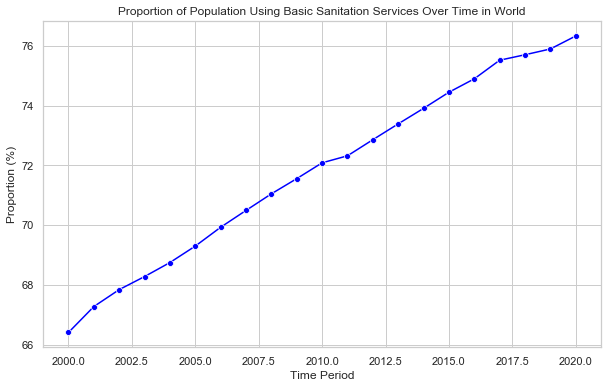

In [72]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='TimePeriod', y='Value', data=world_A6, marker='o',c='blue')
plt.title('Proportion of Population Using Basic Sanitation Services Over Time in World')
plt.xlabel('Time Period')
plt.ylabel('Proportion (%)')
plt.grid(True)
plt.show()

#### Analysis:

The data represents the proportion of the global population with access to basic sanitation services from 2000 to 2020. Over this period, there is a discernible positive trend, reflecting an overall improvement in global sanitation access. Starting at 66.42% in 2000, the proportion steadily increases, reaching 76.32% in 2020. This upward trajectory indicates progress in efforts to extend basic sanitation services to a larger segment of the world's population. The years from 2010 onwards show a more pronounced incline, suggesting accelerated advancements in the past decade. The consistent growth is a positive indicator of global initiatives and investments in sanitation infrastructure. However, it's important to note that despite the overall progress, there are still significant populations without adequate sanitation access, and disparities may exist between regions or countries. 

#### Objective: Proportion of population using basic sanitation services, by location (%) in India

In [73]:
A6_India=A6[A6.GeoAreaName=='India']

In [74]:
b=A6_India.pivot_table(index='TimePeriod',values='Value',aggfunc='mean').sort_values(by='TimePeriod',ascending=True)
b=b.reset_index()
b


,TimePeriod,Value
0,2000,21.666667
1,2001,24.333333
2,2002,26.333333
3,2003,29.000000
4,2004,31.333333
5,2005,33.333333
6,2006,36.000000
7,2007,39.000000
8,2008,41.333333
9,2009,44.000000


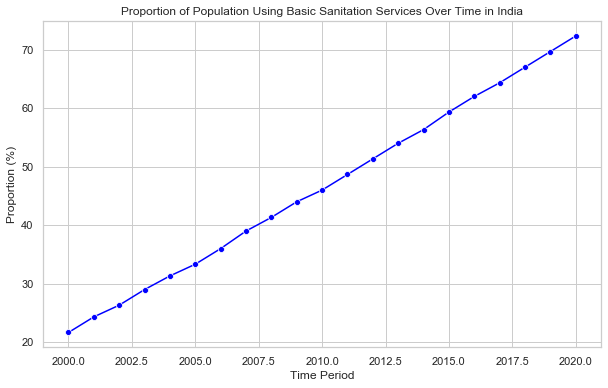

In [75]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='TimePeriod', y='Value', data=b, marker='o',c='blue')
plt.title('Proportion of Population Using Basic Sanitation Services Over Time in India')
plt.xlabel('Time Period')
plt.ylabel('Proportion (%)')
plt.grid(True)
plt.show()

#### Analysis:
The data illustrates a positive and consistent upward trend in the proportion of the Indian population with access to basic sanitation services from 2000 to 2020, reflecting substantial progress over the two decades. The most significant growth is observed from 2010 onwards, indicating intensified efforts and investments in sanitation infrastructure during this period. While the overall trend is promising, it underscores the persistent challenge of ensuring adequate sanitation access for all. A critical analysis reveals that a substantial proportion of the population still lacks such access, emphasizing the need for targeted interventions to address regional disparities and economic constraints. This data serves as a valuable benchmark for assessing India's standing on a global scale and informs future strategies to achieve universal access to basic sanitation services.

#### Objective: Comparison of India vs World on the proportion of population using basic sanitation services

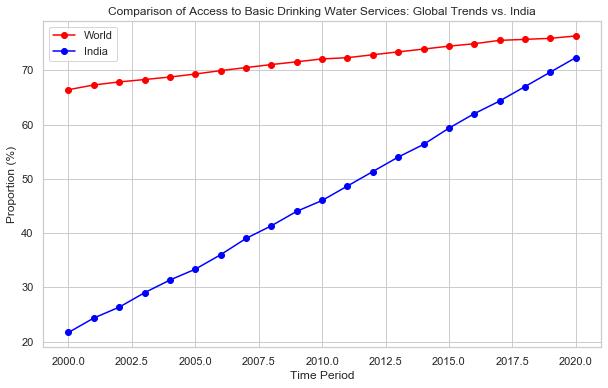

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(world_A6['TimePeriod'],world_A6['Value'],marker='o',c='red',label='World')
plt.plot(b['TimePeriod'],b['Value'],c='blue',marker='o',label='India')
plt.title('Comparison of Access to Basic Drinking Water Services: Global Trends vs. India')
plt.xlabel('Time Period')
plt.ylabel('Proportion (%)')
plt.legend()
plt.grid(True)
plt.show()

#### Analysis:
The comparative analysis of basic sanitation access between India and the world from 2000 to 2020 reveals intriguing trends. While both India and the global average have shown improvements over the years, India has made significant strides in enhancing sanitation access, albeit starting from a lower baseline. In 2000, the global proportion stood at 66.42%, far surpassing India's 21.67%. However, by 2020, India has narrowed this gap, reaching 72.33% compared to the global average of 76.32%. This indicates a robust growth rate in India, outpacing the global average, particularly evident in the accelerated increase post-2010. The data underscores India's focused efforts and investments in sanitation infrastructure, leading to substantial progress. Nevertheless, challenges persist, emphasizing the need for sustained initiatives to bridge the remaining gap and ensure universal access. The comparative analysis serves as a valuable benchmark, highlighting India's commendable advancements while outlining areas for continued focus and improvement.

#### Objective: Comparison of BRICS nations on the proportion of population using basic sanitation services

In [103]:
brics_A6=A6[A6.GeoAreaName.isin(['Brazil','Russian Federation','India','China','South Africa'])]

In [104]:
pv_brics=brics_A6.pivot_table(index=['GeoAreaName','TimePeriod'],values='Value',aggfunc='mean')
pv_brics=pv_brics.reset_index()
pv_brics

,GeoAreaName,TimePeriod,Value
0,Brazil,2000,64.000000
1,Brazil,2001,64.666667
2,Brazil,2002,65.666667
3,Brazil,2003,66.333333
4,Brazil,2004,67.666667
...,...,...,...
100,South Africa,2016,74.666667
101,South Africa,2017,75.666667
102,South Africa,2018,77.000000
103,South Africa,2019,78.000000


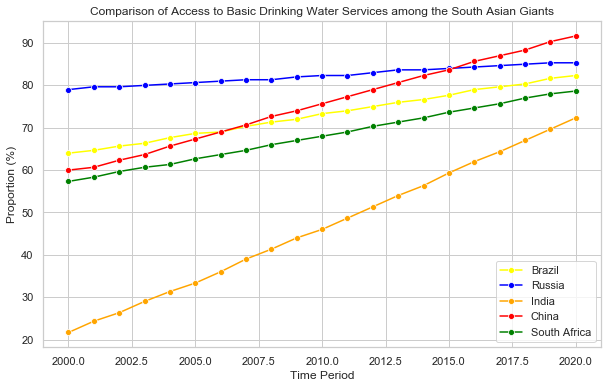

In [105]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='TimePeriod', y='Value', data=pv_brics[pv_brics.GeoAreaName=='Brazil'], marker='o',c='yellow',label='Brazil')
sns.lineplot(x='TimePeriod', y='Value', data=pv_brics[pv_brics.GeoAreaName=='Russian Federation'], marker='o',c='blue',label='Russia')
sns.lineplot(x='TimePeriod', y='Value', data=pv_brics[pv_brics.GeoAreaName=='India'], marker='o',c='orange',label='India')
sns.lineplot(x='TimePeriod', y='Value', data=pv_brics[pv_brics.GeoAreaName=='China'], marker='o',c='red',label='China')
sns.lineplot(x='TimePeriod', y='Value', data=pv_brics[pv_brics.GeoAreaName=='South Africa'], marker='o',c='green',label='South Africa')
plt.title('Comparison of Access to Basic Drinking Water Services among the South Asian Giants')
plt.xlabel('Time Period')
plt.ylabel('Proportion (%)')
plt.legend()
plt.grid(True)
plt.show()

#### Analysis:
The provided data compares the proportion of the population with access to basic sanitation services across four BRICS Nations—Brazil,Russia,India, China, and South Africa—from 2000 to 2020. The analysis reveals distinct patterns in sanitation accessibility among these nations. In 2000, Russia had the highest proportion at around 80%, followed by Brazil (64%) China (60%), South Africa (57.33%), and India (21.67%). Over the years, China exhibits a remarkable upward trend, surpassing all other countries by 2020 with a proportion of 91.67%. Brazil and South Africa also show consistent growth, reaching 82.33% and 78.67%, respectively, by 2020. India demonstrates substantial progress, narrowing the initial gap with a proportion of 72.33% in 2020. The comparative analysis underscores China's remarkable strides in sanitation access, possibly driven by rapid urbanization and infrastructure development. While India has made commendable progress, addressing regional disparities remains crucial for achieving universal access. Brazil and South Africa's steady growth reflects sustained efforts, emphasizing the importance of national policies in improving sanitation infrastructure.

### Target Indicatior : 1.4.2 Proportion of people with legally recognized documentation of their rights to land out of total adult population, by sex (%)

Parameters Under Indicator 1.4.2

['Proportion of people with legally recognized documentation of their rights to land out of total adult population, by sex (%)'
 'Proportion of people who perceive their rights to land as secure out of total adult population, by sex (%)'
 'Proportion of people with secure tenure rights to land out of total adult population, by sex (%)'] 

In [80]:
target1_4_2=data[data.Indicator=='1.4.2']

In [81]:
A7=target1_4_2[target1_4_2.SeriesDescription=='Proportion of people with legally recognized documentation of their rights to land out of total adult population, by sex (%)']
A8=target1_4_2[target1_4_2.SeriesDescription=='Proportion of people who perceive their rights to land as secure out of total adult population, by sex (%)']
A9=target1_4_2[target1_4_2.SeriesDescription=='Proportion of people with secure tenure rights to land out of total adult population, by sex (%)']


#### Objective: Proportion of people with legally recognized documentation of their rights to land out of total adult population, by sex (%) over time in World

In [82]:
world_A7=A7.pivot_table(index='TimePeriod',values='Value',aggfunc='mean')
world_A7=world_A7.reset_index()
world_A7


,TimePeriod,Value
0,2011,67.066667
1,2012,46.100000
2,2013,39.550000
3,2014,30.250000
4,2015,37.716667
5,2016,28.844444
6,2017,28.900000
7,2018,14.957143


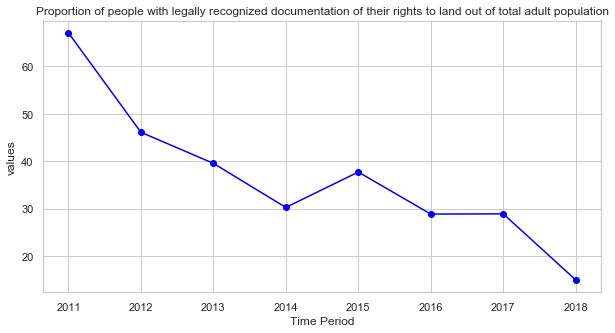

In [83]:
plt.figure(figsize=(10,5)) 
plt.plot(world_A7['TimePeriod'],world_A7['Value'],c='blue',marker='o') 
plt.title("Proportion of people with legally recognized documentation of their rights to land out of total adult population") 
plt.xlabel("Time Period")
plt.ylabel("values")
plt.show()



#### Analysis:
The data presents the proportion of people with legally recognized documentation of their rights to land as a percentage of the total adult population, categorized by sex, from 2011 to 2018 globally. The trends reveal a fluctuating pattern over the years. In 2011, the proportion was at 67.07%, indicating a relatively high level of legally recognized land rights. However, a notable decline is observed in 2012, dropping to 46.1%, and further to 39.55% in 2013. This decline may suggest challenges or changes in legal documentation processes or shifts in policy frameworks during this period. The proportion experiences a temporary increase in 2015, reaching 37.72%, but subsequently decreases in 2016 and 2017. The data for 2018 shows a significant drop to 14.96%, indicating a substantial decrease in the proportion of the population with legally recognized land rights. 

In [84]:
A7.pivot_table(index='Sex',values='Value',aggfunc='mean')

,Value
Sex,
BOTHSEX,38.755882
FEMALE,21.280000


#### Objective:  Comparing the top 10 countries with respect to the proportion of people with legally recognized documentation of their rights to land out of total adult population, by sex (%) over time in World

In [85]:
a=A7.pivot_table(index='GeoAreaName',values='Value',aggfunc='mean').sort_values(by='Value',ascending=False)
a=a.reset_index()
a=a.head(10)
a


,GeoAreaName,Value
0,Costa Rica,100.00
1,Republic of Korea,100.00
2,New Zealand,99.00
3,Rwanda,86.10
4,Netherlands,82.00
5,Belgium,74.55
6,Sweden,64.75
7,Lesotho,61.10
8,Mongolia,46.10
9,Armenia,35.80


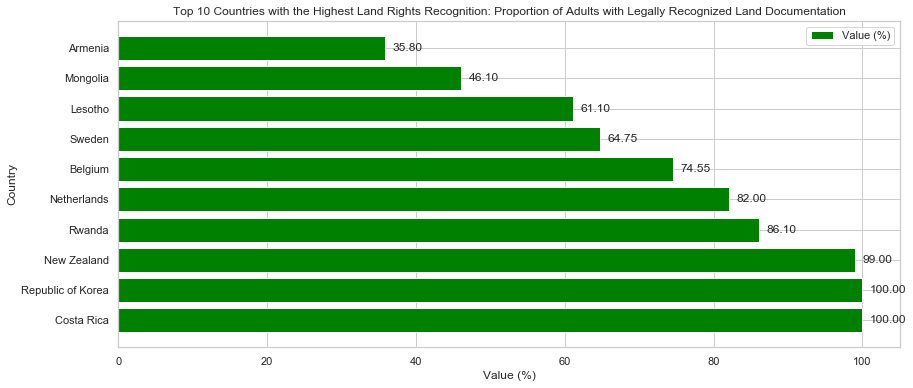

In [86]:
# Plotting
plt.figure(figsize=(14, 6))
bars = plt.barh(a['GeoAreaName'], a['Value'], color='green', label='Value')

# Adding values on top of each bar
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', ha='left', va='center')

# Adding labels and title
plt.xlabel('Value (%)')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Highest Land Rights Recognition: Proportion of Adults with Legally Recognized Land Documentation')

# Adding legend
plt.legend(['Value (%)'])

# Display the plot
plt.show()


#### Analysis:
he data showcases the top 10 countries with the highest proportion of people possessing legally recognized documentation of their rights to land as a percentage of the total adult population. Costa Rica and the Republic of Korea lead with a perfect score of 100%, signifying that every adult in these countries has legally recognized land rights. New Zealand follows closely with 99%. Rwanda, Netherlands, and Belgium also demonstrate substantial legal recognition, with proportions exceeding 74%. However, variations are noticeable, indicating differences in land documentation practices and policies across countries. Sweden, Lesotho, Mongolia, and Armenia round out the top 10, with proportions ranging from 46.1% to 35.8%. The data underscores the diverse approaches to land rights and the varying degrees of legal recognition among nations. Analyzing the policies and mechanisms contributing to high scores in these countries could provide valuable insights for nations seeking to strengthen land tenure systems and enhance the protection of property rights.

#### Objective:  Comparing the bottom 10 countries with respect to the proportion of people with legally recognized documentation of their rights to land out of total adult population, by sex (%) over time in World

In [87]:
c=A7.pivot_table(index='GeoAreaName',values='Value',aggfunc='mean').sort_values(by='Value',ascending=False)
c=c.reset_index()
c=c.tail(10)
c


,GeoAreaName,Value
23,Côte d'Ivoire,13.45
24,South Africa,13.20
25,Malawi,12.25
26,Guinea,11.55
27,Nigeria,7.35
28,Niger,7.30
29,Zambia,7.10
30,Cameroon,6.25
31,Burundi,5.70
32,Pakistan,5.65


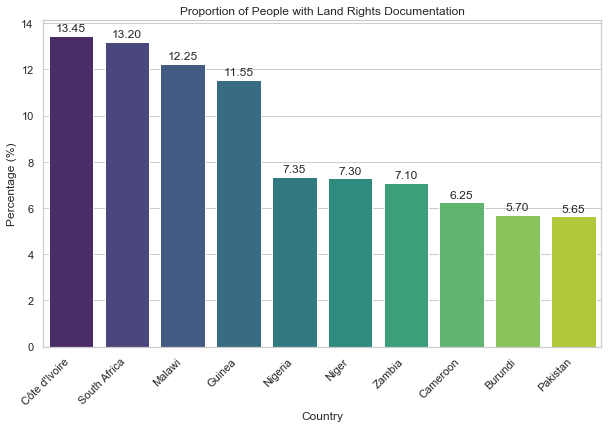

In [89]:
# Create a Seaborn bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='GeoAreaName', y='Value', data=c, palette='viridis')
barplot.set(xlabel='Country', ylabel='Percentage (%)', title='Proportion of People with Land Rights Documentation')

# Add data labels to the bars
for index, value in enumerate(c['Value']):
    barplot.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

barplot.set(xlabel='Country', ylabel='Percentage (%)', title='Proportion of People with Land Rights Documentation')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### Analysis:
The dataset delineates the land rights documentation landscape in the bottom 10 countries, revealing proportions ranging from 5.65% in Pakistan to 13.45% in Côte d'Ivoire. This collective portrayal underscores the pressing issue of limited legal recognition of land rights within diverse regions, spanning Africa and Asia. Notably, Côte d'Ivoire, despite its relatively higher proportion, signifies persistent challenges, while Pakistan's position at the bottom highlights pronounced deficiencies. The absence of a specified time frame inhibits the assessment of temporal trends, and a gender-specific breakdown is necessary to illuminate potential disparities. This dataset serves as a stark reminder of the urgent need for targeted interventions and comprehensive policy frameworks to address the pervasive inadequacies in land rights documentation across these nations, ultimately striving for a more equitable and just distribution of land rights.

### Target Indicatior : 1.4.2 Proportion of people who perceive their rights to land as secure out of total adult population, by sex (%)

#### Objective: Proportion of people who perceive their rights to land as secure out of total adult population, by sex (%) over time in World

In [90]:
world_A8=A8.pivot_table(index='TimePeriod',values='Value',aggfunc='mean')
world_A8=world_A8.reset_index()
world_A8


,TimePeriod,Value
0,2011,93.300
1,2012,96.600
2,2013,88.875
3,2014,91.900
4,2015,83.300
5,2016,96.000
6,2018,96.000


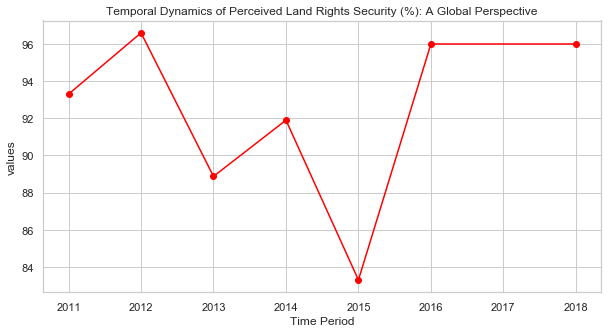

In [91]:
plt.figure(figsize=(10,5)) 
plt.plot(world_A8['TimePeriod'],world_A8['Value'],c='red',marker='o') 
plt.title("Temporal Dynamics of Perceived Land Rights Security (%): A Global Perspective") 
plt.xlabel("Time Period")
plt.ylabel("values")
plt.show()



#### Analysis:
The dataset provides a temporal perspective on the perceived security of land rights as a percentage of the total adult population worldwide. The values, ranging from 83.3% in 2015 to 96.6% in 2012, offer insights into the fluctuations in perceived land rights security over the specified time period. The general trend appears to be positive, with a peak in 2012 followed by a slight dip in 2013 and 2015. The subsequent years, 2016 and 2018, show a stabilization and restoration to a 96% perceived security level. While the dataset captures the fluctuations, a deeper analysis would benefit from contextual information, such as political, economic, and social factors, to discern the driving forces behind these variations. Additionally, understanding potential gender-based differences in the perception of land rights security would enrich the analysis. This dataset prompts policymakers and researchers to delve into the nuanced dynamics influencing perceptions of land rights and to consider these factors in shaping policies aimed at ensuring a widespread sense of security and equity in land ownership.

#### Objective:  Comparing the top 10 countries with respect to the proportion of people with legally recognized documentation of their rights to land out of total adult population, by sex (%) over time in World

In [92]:
c=A8.pivot_table(index='GeoAreaName',values='Value',aggfunc='mean').sort_values(by='Value',ascending=False)
c=c.reset_index()
c=c.head(10)
c


,GeoAreaName,Value
0,Benin,98.5
1,Costa Rica,97.8
2,Guinea-Bissau,97.6
3,Niger,97.4
4,Togo,97.2
5,Sweden,96.9
6,Rwanda,96.9
7,Netherlands,96.8
8,Côte d'Ivoire,96.7
9,Mongolia,96.6


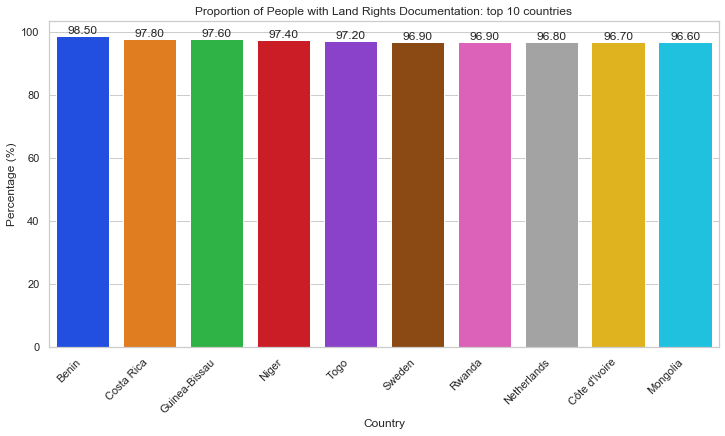

In [93]:
# Create a Seaborn bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='GeoAreaName', y='Value', data=c, palette='bright')
barplot.set(xlabel='Country', ylabel='Percentage (%)', title='Proportion of People with Land Rights Documentation')

# Add data labels to the bars
for index, value in enumerate(c['Value']):
    barplot.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

barplot.set(xlabel='Country', ylabel='Percentage (%)', title='Proportion of People with Land Rights Documentation: top 10 countries')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### Analysis:
The dataset illuminates the top 10 countries based on the proportion of people who perceive their land rights as secure out of the total adult population. Ranging from 96.6% in Mongolia to 98.5% in Benin, these nations exhibit notably high levels of perceived land rights security. Benin leads the list with an impressive 98.5%, reflecting a widespread sense of confidence in land ownership. Costa Rica, Guinea-Bissau, Niger, and Togo closely follow, each surpassing the 97% mark, showcasing a remarkable consistency in perceived land rights across these diverse regions. Sweden, Rwanda, Netherlands, Côte d'Ivoire, and Mongolia complete the top 10, all registering percentages above 96%. This dataset underscores the significance of factors contributing to positive perceptions, possibly including strong legal frameworks, stable socio-political conditions, and effective communication of land rights. 

#### Objective:  Comparing the bottom 10 countries with respect to the proportion of people with legally recognized documentation of their rights to land out of total adult population, by sex (%) over time in World

In [94]:
d=A8.pivot_table(index='GeoAreaName',values='Value',aggfunc='mean').sort_values(by='Value',ascending=True)
d=d.reset_index()
d=d.head(10)
d


,GeoAreaName,Value
0,Malawi,69.7
1,Nigeria,74.1
2,Mozambique,81.1
3,Senegal,87.7
4,Uganda,91.9
5,New Zealand,92.5
6,Lesotho,92.9
7,Belgium,93.9
8,Republic of Korea,96.0
9,United Republic of Tanzania,96.0


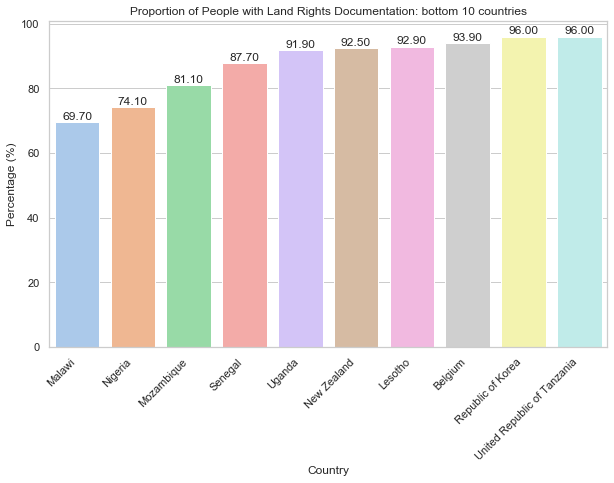

In [95]:
# Create a Seaborn bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='GeoAreaName', y='Value', data=d, palette='pastel')
barplot.set(xlabel='Country', ylabel='Percentage (%)', title='Proportion of People with Land Rights Documentation')

# Add data labels to the bars
for index, value in enumerate(d['Value']):
    barplot.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

barplot.set(xlabel='Country', ylabel='Percentage (%)', title='Proportion of People with Land Rights Documentation: bottom 10 countries')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### Analysis:
The data presents the bottom 10 countries based on the proportion of people with legally recognized documentation of their rights to land out of the total adult population, by sex (%). Malawi ranks at the bottom of the list with a value of 69.7, indicating challenges in ensuring legal documentation of land rights. Nigeria, Mozambique, Senegal, and Uganda follow, all with values below 92, suggesting significant gaps in legally recognized land rights. New Zealand, Lesotho, Belgium, and the Republic of Korea appear unexpectedly in the bottom 10, emphasizing the global nature of the issue. The United Republic of Tanzania completes the list with a value of 96.0. This data underscores the need for focused efforts to improve the legal recognition of land rights in these countries, addressing barriers that hinder the documentation process and ensuring equitable access to land rights for all adults.

### Target Indicatior : 1.4.2 Proportion of people with secure tenure rights to land out of total adult population, by sex (%)

#### Objective: Proportion of people with secure tenure rights to land out of total adult population, by sex (%) over time in World

In [96]:
world_A9=A9.pivot_table(index='TimePeriod',values='Value',aggfunc='mean')
world_A9=world_A9.reset_index()
world_A9


,TimePeriod,Value
0,2011,95.450000
1,2012,80.900000
2,2013,85.700000
3,2014,90.200000
4,2015,74.616667
5,2016,67.375000
6,2017,58.850000
7,2018,69.988889


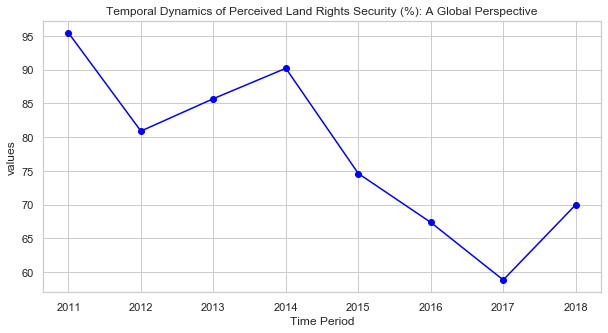

In [97]:
plt.figure(figsize=(10,5)) 
plt.plot(world_A9['TimePeriod'],world_A9['Value'],c='blue',marker='o') 
plt.title("Temporal Dynamics of Perceived Land Rights Security (%): A Global Perspective") 
plt.xlabel("Time Period")
plt.ylabel("values")
plt.show()

#### Analysis:
The dataset illustrates the global trajectory of the proportion of people with secure tenure rights to land out of the total adult population, by sex (%), over the period from 2011 to 2018. Beginning at a relatively high level of 95.45% in 2011, there is a sharp decline in 2012 to 80.9%, suggesting a noteworthy and potentially concerning shift in land tenure security. Subsequent years witness fluctuating trends, with partial recoveries in 2013 and 2014 (85.7% and 90.2%, respectively) but a pronounced dip in 2015 to 74.62%. The years 2016 and 2017 continue the downward trajectory, hitting values of 67.38% and 58.85%, respectively. A notable recovery is observed in 2018, reaching 69.99%, yet remaining below earlier levels. This dynamic pattern underscores the complex and potentially volatile nature of land tenure security globally, urging further exploration into the contributing factors and the necessity for sustained efforts to ensure secure land rights for all.

#### Objective: Comparing top 10 countries on the basis of proportion of people with secure tenure rights to land out of total adult population, by sex (%) over time in World

In [98]:
pv_a9=A9.pivot_table(index='GeoAreaName',values='Value',aggfunc='mean').sort_values(by='Value',ascending=False)
pv_a9=pv_a9.reset_index()
pv_a9=pv_a9.head(10)
pv_a9


,GeoAreaName,Value
0,Belgium,99.0
1,Costa Rica,97.8
2,Netherlands,96.8
3,Republic of Korea,96.0
4,New Zealand,93.4
5,Lesotho,91.4
6,Uganda,90.2
7,Rwanda,88.6
8,Mozambique,88.2
9,Malawi,86.8


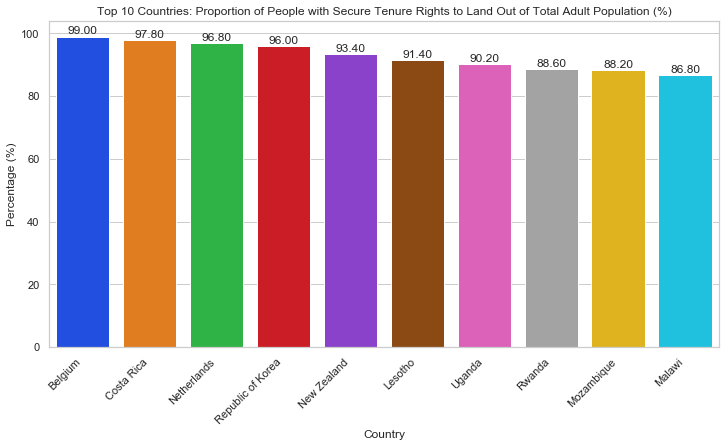

In [99]:
# Create a Seaborn bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='GeoAreaName', y='Value', data=pv_a9, palette='bright')
barplot.set(xlabel='Country', ylabel='Percentage (%)', title='Proportion of People with Land Rights Documentation')

# Add data labels to the bars
for index, value in enumerate(pv_a9['Value']):
    barplot.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

barplot.set(xlabel='Country', ylabel='Percentage (%)', title='Top 10 Countries: Proportion of People with Secure Tenure Rights to Land Out of Total Adult Population (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### Analysis:
The provided data highlights the top 10 countries based on the proportion of people with secure tenure rights to land out of the total adult population, by sex (%). Belgium leads the list with an impressive value of 99.0, indicating a high level of security in land tenure rights. Following closely are Costa Rica, the Netherlands, and the Republic of Korea, with values ranging from 96.0 to 97.8, showcasing a strong commitment to ensuring secure land rights in these nations. New Zealand, Lesotho, and Uganda also demonstrate notable percentages, standing at 93.4, 91.4, and 90.2, respectively. Rwanda, Mozambique, and Malawi complete the top 10 with values ranging from 88.2 to 88.6, reflecting commendable efforts in securing land tenure rights. This list underscores the diverse global landscape of land tenure security and highlights the positive strides made by these countries in safeguarding individuals' rights to land.

#### Objective: Comparing bottom 10 countries on the basis of proportion of people with secure tenure rights to land out of total adult population, by sex (%) over time in World

In [100]:
pv_a9_bottom=A9.pivot_table(index='GeoAreaName',values='Value',aggfunc='mean').sort_values(by='Value',ascending=True)
pv_a9_bottom=pv_a9_bottom.reset_index()
pv_a9_bottom=pv_a9_bottom.head(10)
pv_a9_bottom


,GeoAreaName,Value
0,South Africa,52.95
1,Togo,56.20
2,Indonesia,58.85
3,Benin,59.20
4,Côte d'Ivoire,61.30
5,Burundi,64.90
6,Armenia,66.60
7,Zambia,66.85
8,Afghanistan,67.05
9,Albania,67.60


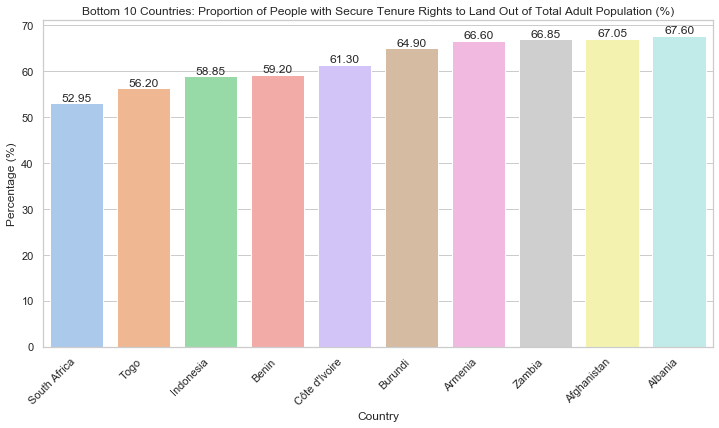

In [101]:
# Create a Seaborn bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='GeoAreaName', y='Value', data=pv_a9_bottom, palette='pastel')
barplot.set(xlabel='Country', ylabel='Percentage (%)', title='Proportion of People with Land Rights Documentation')

# Add data labels to the bars
for index, value in enumerate(pv_a9_bottom['Value']):
    barplot.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

barplot.set(xlabel='Country', ylabel='Percentage (%)', title='Bottom 10 Countries: Proportion of People with Secure Tenure Rights to Land Out of Total Adult Population (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### Analysis:
The data reveals the bottom 10 countries based on the proportion of people with secure tenure rights to land out of the total adult population, by sex (%). South Africa appears at the bottom of the list with a value of 52.95, indicating a concerning level of insecurity in land tenure rights. Togo, Indonesia, Benin, and Côte d'Ivoire follow closely, all with values below 60, highlighting significant challenges in ensuring secure land rights in these nations. Burundi, Armenia, Zambia, Afghanistan, and Albania complete the bottom 10 with values ranging from 64.90 to 67.60. This data underscores the urgent need for targeted interventions and policy reforms to address the underlying issues contributing to the lower percentages in these countries, emphasizing the global disparities in securing land tenure rights.

### Conclusion:

A thorough examination of the data related to SDG Goals 1.3.1, 1.4.1, and 1.4.2, with a specific emphasis on India's advancements, underscores the nation's pivotal role in the worldwide endeavor to eliminate poverty and establish robust social protection measures. Within the context of SDG Goal 1.3.1, India has demonstrated resilience in managing global economic challenges, such as the 2008 financial crisis, showcasing adaptability amid adversity [2]. Fluctuations in social protection metrics highlight India's dynamic response to global events, emphasizing the interconnected nature of economic indicators and social protection systems.

India's performance in SDG Goal 1.4.1 is noteworthy, displaying a consistent upward trend in the expansion of social protection system coverage [1]. This trajectory not only signifies a dedication to national development objectives but also positions India as a model of progress in the global mission to ensure that no one is left behind in the fight against poverty.

Furthermore, regarding SDG Goal 1.4.2, India's endeavors to address gender disparities in accessing essential services align with global aspirations for inclusivity. By recognizing the significance of gender-responsive social protection frameworks, India contributes to a more equitable global landscape.

In comparison to the global scenario, India's progress is remarkable when analyzed through a data analytics lens. Despite persistent challenges, particularly considering the vastness and diversity of the country, India's positive trajectory reflects a commitment to constructing a sustainable, inclusive, and poverty-free future. The nation's proactive response to global economic challenges and its advancements in social protection coverage position it as a substantial contributor to the collective global effort to attain these critical Sustainable Development Goals. Sustained dedication to strategic initiatives will play a crucial role in maintaining and further accelerating this positive trajectory on the global stage.

### Comprehensive Recommendations for SDG Goals 1.3 and 1.4

1. **Strengthen Social Protection Systems**: Invest in the enhancement and fortification of social protection systems to ensure comprehensive coverage for vulnerable populations. This includes adapting policies to respond to changing economic and geopolitical scenarios, particularly during global crises.

2. **Foster Global Collaboration**: Encourage international collaboration to facilitate the exchange of best practices and lessons learned in implementing effective social protection measures [2]. A collective effort is vital to accelerating global progress toward achieving SDG Goal 1.3.

3. **Enhance Data Transparency**: Improve data transparency and monitoring mechanisms to accurately assess the impact of social protection programs. Transparent and reliable data is crucial for evidence-based decision-making, resource allocation, and continuous evaluation of outcomes.

4. **Expand Outreach and Accessibility**: Scale up efforts to expand the outreach of social protection programs, particularly to marginalized and remote populations. Emphasize inclusivity to ensure that no one is left behind, aligning with the objectives of SDG Goal 1.4.1.

5. **Explore Innovative Financing Models**: Explore and implement innovative financing models to sustainably fund social protection initiatives. Public-private partnerships, impact investments, and leveraging technology can enhance the financial viability of these programs, contributing to the achievement of SDG Goal 1.4.1.

6. **Implement Gender-Responsive Policies**: Integrate and strengthen gender-responsive policies within social protection frameworks. This includes addressing unique challenges faced by women, promoting gender equality, and contributing to the realization of SDG Goal 1.4.2.

7. **Continuous Monitoring and Evaluation**: Establish and maintain robust monitoring and evaluation mechanisms to track the effectiveness of social protection programs. Regular assessments will enable policymakers to identify areas for improvement, optimize resource allocation, and ensure the sustained impact of interventions related to SDG Goal 1.4.

By implementing these holistic recommendations, nations can collectively propel progress toward SDG Goal 1.3 by fortifying social protection systems and SDG Goal 1.4 by expanding coverage, ensuring equity, and leaving no one behind in the pursuit of a poverty-free and inclusive world.


### References:
- [1] SDGs: India’s progress analysis (2023) CivilsDaily. Available at: https://www.civilsdaily.com/news/sdgs-analysis-on-indias-progress/ (Accessed: 01 October 2023). 
- [2]The Hindu. "India, its SDG pledge goal, and the strategy to apply", The hindu, 01 May. 2023. Available: https://wikthehindu.com/opinion/lead/india-its-sdg-pledge-goal-and-the-strategy-to-apply/article66797430.eceipedia.com. [Accessed 02 October. 2023].